In [301]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

## ma_ntl_data_updatedsums_Latest_Alldata is the main file
# ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_updatedsums_NEW_Alldata.csv',low_memory=False) #ma_ntl_data ma_ntl_data_updatedsums_NoVIIRS ma_ntl_data_updatedsums_NEW ma_ntl_data_updatedsums_NEW_Alldata

ma = pd.read_csv('/Users/sid/Desktop/ma_ntl_data_updatedsums_Latest_Alldata.csv',low_memory=False)

meg = ma.copy()
meg = meg.drop([
    # 'Subdistrict', 'SubDistrict code', 'District','District code','Block code', 'Block', 'State',
    #    'State code','Village',
       'other_assembly_constituencies',
       'subdist_ntl_pa'
       ], axis=1)

meg = meg.rename(columns={
                        'state_name': 'State', 
                        'district_name': 'District',
                        'gp_name':'GP',
                        'sub_district_name':'Subdistrict',
                        'village_name':'Village','block_name':'Block',
                        'state_code':'State_code','district_code':'District_code','sub_district_code':'Subdistrict_code',
                        'block_code':'Block_code','gp_code':'GP_code',
                        'Village code':'Village_code'
                                    })

meg = meg.dropna(subset=['avg_ntl'])
meg = meg.dropna(subset=['total_population'])
meg = meg[meg['total_population'] != 'Nava Mota']
meg['total_population'] = meg['total_population'].astype(float)
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']

# Reset the index if needed
meg.reset_index(drop=True, inplace=True)
meg['total_population'] = meg['total_population'].astype(float)

# sum all other edu
columns_to_sum_2 = [
                    'availability_of_govt_degree_college',
                    'availability_of_high_school',
                    'availability_of_middle_school',
                    'availability_of_ssc_school',
                    'is_vocational_edu_centre_available'
                    ]
columns_to_sum_3 = [
                    'availability_of_phc_chc',
                    'availability_of_jan_aushadhi_kendra',
                    'availability_of_mother_child_health_facilities',
                    'is_aanganwadi_centre_available',
                    'is_early_childhood_edu_provided_in_anganwadi',
                    'is_veterinary_hospital_available'
                    ]
meg['med_other'] = meg[columns_to_sum_3].sum(axis=1)
# Create a new column 'agro' with the sum of values from specified columns
meg['edu_other'] = meg[columns_to_sum_2].sum(axis=1)


In [223]:
# Calculate the mean of each column and store it in a new Series
averages = meg[[
    'total_population',
    # 'availability_of_farm_gate_processing', 
    # 'availability_of_food_storage_warehouse', 
    # 'availability_of_goatary_dev_project', 
    # 'availability_of_milk_routes', 
    # 'availability_of_pigery_development', 
    # 'availability_of_poultry_dev_project', 
    # 'is_common_pastures_available', 
    # 'is_fertilizer_shop_available', 
    # 'is_govt_seed_centre_available', 
    # 'availability_of_major_source_of_irrigation', 
    # 'availability_of_livestock_extension_services', 
    # 'is_soil_testing_centre_available',
    'availability_of_govt_degree_college',
    'availability_of_high_school',
    'availability_of_middle_school',
    'availability_of_primary_school',
    'availability_of_ssc_school',
    'availability_of_phc_chc',
    'availability_of_jan_aushadhi_kendra',
    'availability_of_mother_child_health_facilities',
    'is_aanganwadi_centre_available',
    'is_veterinary_hospital_available',
    'availability_of_market',
    'availability_of_panchayat_bhawan',
    'availability_of_public_transport',
    'availability_of_railway_station',
    'is_bank_available',
    'is_post_office_available',
    'is_village_connected_to_all_weather_road',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
               ]]

# Print the averages
summary_stats = averages.describe()
summary_stats

,total_population,availability_of_govt_degree_college,availability_of_high_school,availability_of_middle_school,availability_of_primary_school,availability_of_ssc_school,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,availability_of_mother_child_health_facilities,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_market,availability_of_panchayat_bhawan,availability_of_public_transport,availability_of_railway_station,is_bank_available,is_post_office_available,is_village_connected_to_all_weather_road,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme
count,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000,539776.00000
mean,1803.09563,0.03164,0.19523,0.41644,0.80201,0.11885,0.12585,0.06498,0.33015,0.81409,0.11420,0.10232,0.44501,0.37715,0.02937,0.12468,0.23787,0.70838,0.93484,0.23580,0.33854,0.68362,0.94094,0.93543
std,2983.06600,0.17504,0.39638,0.49297,0.39848,0.32361,0.33168,0.24648,0.47027,0.38904,0.31805,0.30307,0.49697,0.48467,0.16884,0.33036,0.42578,0.45451,0.24681,0.42450,0.47321,0.46507,0.23574,0.24576
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,480.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
50%,1043.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000
75%,2085.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000
max,99989.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [215]:
# subset_df = meg[['Village_code', 'total_population']]
# subset_df.to_csv('/Users/sid/Desktop/vilpop.csv',index=False)

## Subdist Level

In [302]:
meg

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,Village,state,district,subdistrict,vil_code,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,med_other,edu_other
0,21,ODISHA,350,CUTTACK,2956,Mahanga,3339,MAHANGA,116997,HALADIA,399515.00000,Juipur,754207.00000,286.00000,2316.00000,10.00000,6.00000,4.00000,4.00000,0.00000,0.00000,0,0,0,0,2.47000,0,0,1,3.00000,0,0,0,0,0,0,3.00000,1,0,0,0,0,3.00000,0,0,0,0,0,2.00000,0,1,1,1,1,1,1,0.00000,0.00000,0,0,0,1.00000,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,Balichandrapur,2.76000,JUIPUR,ODISHA,Cuttack,Mahanga,399515.00000,95.00000,0.73462,232.34746,8.64667,11.77029,4.00000,0,0,0,3.00000,0,0.86467,0,0
1,21,ODISHA,350,CUTTACK,2956,Mahanga,3339,MAHANGA,116997,HALADIA,399612.00000,Jhadeswarpur,754207.00000,286.00000,2316.00000,3365.00000,1714.00000,1651.00000,829.00000,700.00000,100.00000,0,0,0,0,101.40000,0,0,1,3.00000,0,0,0,0,0,1,3.00000,1,0,0,0,0,3.00000,0,0,0,0,0,405.00000,1,1,0,0,1,1,1,32.00000,3.00000,1,0,0,30.00000,0,0,0,0,0,1,0,12.00000,12.00000,6.00000,6.00000,12.00000,12.00000,0.00000,12.00000,6.00000,6.00000,21.00000,0,0,12.00000,12.00000,Balichandrapur,0.59326,JHADESWARPUR,ODISHA,Cuttack,Mahanga,399612.00000,95.00000,3.24945,232.34746,25.98444,7.99657,4.00000,2,1,0,4.00000,0,0.00772,1,1
2,21,ODISHA,373,SUNDARGARH,2826,Koida,3579,KOIDA,121618,MALDA,384764.00000,Kalmanga,770048.00000,293.00000,2363.00000,250.00000,158.00000,92.00000,98.00000,0.00000,0.00000,0

In [304]:
mer_sub = meg.groupby(['State','District','District_code','Subdistrict']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum',
                                                                               'availability_of_primary_school':'sum',
                                                                               'edu_other':'sum','med_other':'sum',
                                                                               'road':'sum','SubDistrict Area':'mean',
                                                                               'ntl_pc':'mean'
                                                                               }).reset_index()
mer_sub['avg_ntl'] = mer_sub['avg_ntl'].astype(float)
mer_sub = mer_sub.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum',
                                  'availability_of_primary_school':'subdist_ps_schools','med_other':'subdist_med_other',
                                  'edu_other':'subdist_edu_other','road':'villages_road',
                                  'ntl_pc':'ntl_pc_mean'
                                  })
mer_sub['subdist_ntl_pc'] = mer_sub['subdist_ntl']/mer_sub['subdist_population']
mer_sub['subdist_ntl_pa'] = mer_sub['subdist_ntl']/mer_sub['SubDistrict Area']
mer_all_sub = pd.merge(meg, mer_sub, on=['State','District','District_code','Subdistrict'], how='outer')
mer_all_sub['subdist_pop_share'] = mer_all_sub['total_population']/mer_all_sub['subdist_population']

mer_all_sub

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,Village,state,district,subdistrict,vil_code,ac_no,village_area_sqkm,SubDistrict Area_x,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,med_other,edu_other,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_ps_schools,subdist_edu_other,subdist_med_other,villages_road,SubDistrict Area_y,ntl_pc_mean,subdist_ntl_pc,subdist_ntl_pa,subdist_pop_share
0,21,ODISHA,350,CUTTACK,2956,Mahanga,3339,MAHANGA,116997,HALADIA,399515.00000,Juipur,754207.00000,286.00000,2316.00000,10.00000,6.00000,4.00000,4.00000,0.00000,0.00000,0,0,0,0,2.47000,0,0,1,3.00000,0,0,0,0,0,0,3.00000,1,0,0,0,0,3.00000,0,0,0,0,0,2.00000,0,1,1,1,1,1,1,0.00000,0.00000,0,0,0,1.00000,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,Balichandrapur,2.76000,JUIPUR,ODISHA,Cuttack,Mahanga,399515.00000,95.00000,0.73462,232.34746,8.64667,11.77029,4.00000,0,0,0,3.00000,0,0.86467,0,0,2588.64667,187784.00000,895.00000,330,295,156,148,147,500,609.00000,232.34746,0.05925,0.01379,11.14127,0.00005
1,21,ODISHA,350,CUTTACK,2956,Mahanga,3339,MAHANGA,116997,HALADIA,399612.00000,Jhadeswarpur,754207.00000,286.00000,2316.00000,3365.00000,1714.00000,1651.00000,829.00000,700.00000,100.00000,0,0,0,0,101.40000,0,0,1,3.00000,0,0,0,0,0,1,3.00000,1,0,0,0,0,3.00000,0,0,0,0,0,405.00000,1,1,0,0,1,1,1,32.00000,3.00000,1,0,0,30.00000,0,0,0,0,0,1,0,12.00000,12.00000,6.00000,6.00000,12.00000,12.00000,0.00000,12.00000,6.00

In [305]:

# Calculate the mean of each column and store it in a new Series
averages = mer_all_sub[['avg_ntl',
                          'village_area_sqkm', # village_area_sqkm area_sq_km
                          'total_population',
               ]].mean()

# Print the averages
print("Average of each column:")
print(averages)

Average of each column:
avg_ntl               36.27933
village_area_sqkm      5.64876
total_population    1803.09563
dtype: float64


In [307]:
columns_to_keep = ['Subdistrict', 'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
                     'subdist_edu_sum', 'subdist_ps_schools','subdist_med_other',
                     'subdist_edu_other','subdist_transportadmin_sum','villages_road','SubDistrict Area']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]
# filter_sub 

# Sorting on NTL_PC

In [326]:
sub_sorted = mer_all_sub.sort_values(by=['State','District', 'Subdistrict','ntl_pc'])
sub_sorted['Index'] = sub_sorted.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted['Max_Len'] = sub_sorted.groupby(['State','District','Subdistrict'])['Index'].transform('max')

In [327]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale2 = sub_sorted.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc','ntl_pc_mean']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale2.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

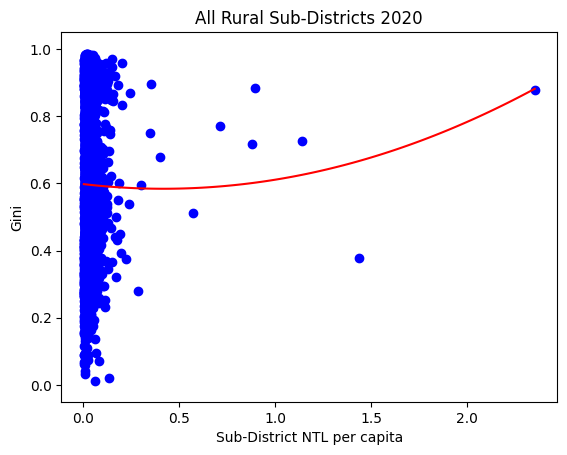

In [330]:
ale = ale2.copy()
ale = ale[ale['alesina'] > 0]
# ale = ale[ale['subdist_ntl_pc'] <= 0.2]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(-0.02,0.6)
plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [329]:
ale2.to_csv('/Users/sid/Desktop/2020gini.csv',index=False)

In [235]:
panel_old = pd.merge(ale2, filter_sub, on=['State','District','District_code','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]


## WCV

In [106]:


# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['subdist_ntl_pc'].mean()
    numerator = (group['subdist_pop_share'] * ((group['ntl_pc'])**2)).sum()
    num = group['Max_Len'].max()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) /bar_y
    return pd.Series ([numerator, wcv,num])

wcv_old = sub_sorted.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc']).apply(calculate_wcv).reset_index()
# Rename the columns for clarity
wcv_old.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc',
               'numer','WCV','num']

wcv_old

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pc,numer,WCV,num
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,182.73600,5983.00000,0.03054,0.00135,1.20124,7.00000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,1470.68700,38310.00000,0.03839,0.01102,2.73488,32.00000
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,367.27100,27718.00000,0.01325,0.00021,1.08800,27.00000
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,983.17000,32784.00000,0.02999,0.01411,3.96067,44.00000
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,1957.77500,48692.00000,0.04021,0.06044,6.11458,46.00000
...,...,...,...,...,...,...,...,...,...,...
5785,WEST BENGAL,PURULIA,321,Purulia - I,1818.13000,171425.00000,0.01061,0.00015,1.16644,107.00000
5786,WEST BENGAL,PURULIA,321,Purulia - II,3312.67000,195385.00000,0.01695,0.00494,4.14631,105.00000
5787,WEST BENGAL,PURULIA,321,Raghunathpur - I,1763.38700,99457.00000,0.01773,0.00075,1.54316,78.00000
5788,WEST BENGAL,PURULIA,321,Raghunathpur - II,3894.61000,134249.00000,0.02901,0.00963,3.38207,89.00000


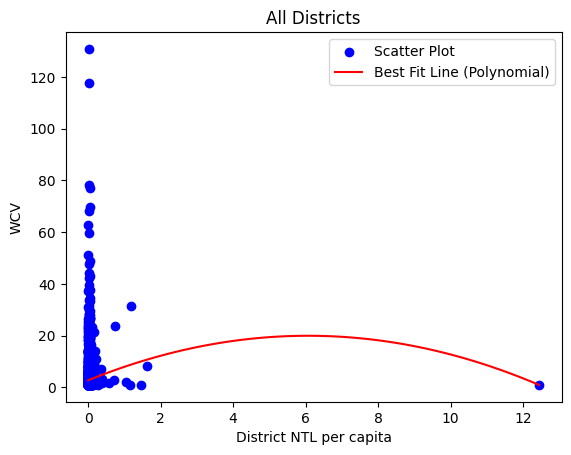

In [107]:
# wcv_old = wcv_old[wcv_old['subdist_ntl_pc'] <= 0.1]
# wcv_old = wcv_old[wcv_old['WCV'] <= 15]
# wcv_old = wcv_old[wcv_old['WCV'] > 0]

# Create a scatterplot
plt.scatter(wcv_old['subdist_ntl_pc'], wcv_old['WCV'], label='Scatter Plot', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcv_old['subdist_ntl_pc'], wcv_old['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcv_old['subdist_ntl_pc']), max(wcv_old['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()
# Display the plot
plt.show()


In [108]:
panel_old_w = pd.merge(wcv_old, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

## Theil

In [114]:
def calculate_theil(group):
    yi = group['ntl_pc']/group['subdist_ntl_pc']
    mu = (group['ntl_pc']*group['subdist_pop_share']).sum()
    t0 = mu/group['ntl_pc']
    # the = (group['pop_share']*yi*np.log(yi)).sum()
    the = (group['subdist_pop_share']*np.log(t0)).sum()
    num = group['Max_Len'].max()
    return pd.Series(the)

thei = sub_sorted.groupby(['Subdistrict','District','District_code','State','subdist_ntl','subdist_population','subdist_ntl_pc',"Max_Len"]).apply(calculate_theil).reset_index()

thei.columns = ['Subdistrict','District','District_code','State','subdist_ntl',
               'subdist_population','subdist_ntl_pc','num','theil']

thei

,Subdistrict,District,District_code,State,subdist_ntl,subdist_population,subdist_ntl_pc,num,theil
0,A.Konduru,KRISHNA,510,ANDHRA PRADESH,2140.77000,48612.00000,0.04404,22,0.24781
1,ADILABAD URBAN,ADILABAD,501,TELANGANA,19.99900,538.00000,0.03717,1,0.00000
2,AHMEDGARH,SANGRUR,43,PUNJAB,2518.24500,110496.00000,0.02279,52,0.16276
3,AIDILABAD RURAL,ADILABAD,501,TELANGANA,1771.04700,32664.00000,0.05422,34,0.13790
4,AJJAMPURA,CHIKKAMAGALURU,532,KARNATAKA,2465.06900,99575.00000,0.02476,110,0.26391
...,...,...,...,...,...,...,...,...,...
5785,Ziradei,SIWAN,222,BIHAR,1773.49100,190483.00000,0.00931,79,0.10188
5786,annur,COIMBATORE,569,TAMIL NADU,4148.00800,180121.00000,0.02303,28,0.11111
5787,jamunaha,SHRAVASTI,181,UTTAR PRADESH,2152.30700,260405.00000,0.00827,90,0.12323
5788,madawara,LALITPUR,161,UTTAR PRADESH,2596.40500,155579.00000,0.01669,102,0.24911


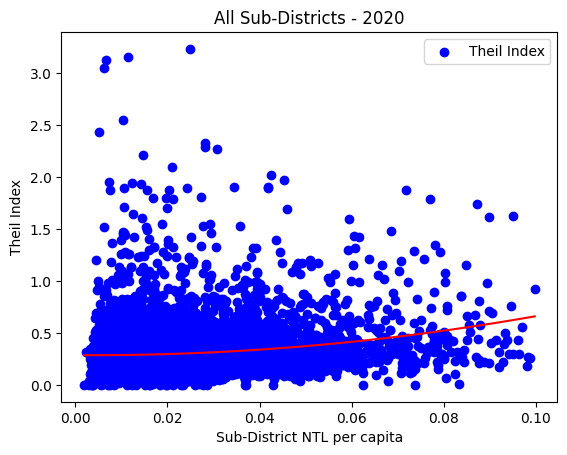

In [113]:
# thei = thei[thei['subdist_ntl_pc'] <= 0.1]
# Create a scatterplot
plt.scatter(thei['subdist_ntl_pc'], thei['theil'], label='Theil Index', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Theil Index")
plt.title("All Sub-Districts - 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(thei['subdist_ntl_pc'], thei['theil'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(thei['subdist_ntl_pc']), max(thei['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')

# plt.ylim(0, 1)

# Add a legend
plt.legend()
# Display the plot
plt.show()

In [115]:
panel_old_t = pd.merge(thei, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

## Categories

In [236]:
df20 = sub_sorted.copy()
df20['str'] = df20['total_primary_school_students']/df20['total_primary_school_teachers']

In [237]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]
# Filtering rows based on the condition
filtered_rows_old = df20[df20['availability_of_primary_school'] < df20[selected_columns[1:]].max(axis=1)]


In [238]:
# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df20[selected_columns[1:]] = df20[selected_columns[1:]].where(
    df20[selected_columns[1:]].le(df20['availability_of_primary_school'], axis=0), 0
)

In [240]:
mer_cat_old = df20.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','village_area_sqkm':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               'availability_of_mother_child_health_facilities':'sum',
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()


In [241]:
mer_cat_old

,Subdistrict,District,District_code,State,total_population,agro,med,edu,transportadmin,village_area_sqkm,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,availability_of_mother_child_health_facilities,nearest_urban_proximity,str
0,A.Konduru,KRISHNA,510,ANDHRA PRADESH,48612.00000,115.00000,50,42,35,557.85007,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,49.00000,2423.00000,1310.00000,1288.00000,15,4.39133,26.43259
1,ADILABAD URBAN,ADILABAD,501,TELANGANA,538.00000,4.00000,1,1,1,3.80410,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,3.00000,39.00000,27.00000,15.00000,0,4.59984,6.33333
2,AHMEDGARH,SANGRUR,43,PUNJAB,111316.00000,445.00000,161,206,179,289.42274,18281.00000,2191.00000,52,16,52,53,52,0,37,47,50,39,4687.00000,587.00000,38,38,37,6,39,30,50,42,122.00000,2641.00000,2165.00000,2309.00000,30,1.09259,11.90651
3,AIDILABAD RURAL,ADILABAD,501,TELANGANA,36636.00000,129.00000,53,58,28,381.24292,9316.00000,6773.00000,28,0,13,33,30,3,3,24,27,31,2594.00000,138.00000,12,9,4,0,1,0,34,1,67.00000,2507.00000,1366.00000,1405.00000,17,3.20419,19.54310
4,AJJAMPURA,CHIKKAMAGALURU,532,KARNATAKA,105524.00000,460.00000,168,180,54,525.59616,22292.00000,17011.00000,94,1,60,97,96,1,9,70,97,94,4027.00000,364.00000,51,19,11,0,11,2,102,16,237.00000,3729.00000,2054.00000,2139.00000,39,17.05294,10.23742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,Ziradei,SIWAN,222,BIHAR,180665.00000,279.00000,84,115,57,149.74507,29819.00000,19192.00000,46,1,4,59,33,8,1,28,58,54,11880.00000,671.00000,38,11,4,2,6,1,71,2,187.00000,9702.00000,7049.00000,6417.00000,5,2.98041,25.33600
5792,annur,COIMBATORE,569,TAMIL NADU,180121.00000,171.00000,68,90,65,371.45673,53258.00000,7258.00000,23,5,26,26,25,2,11,23,25,25,4581.00000,245.00000,20,11,12,12,9,8,28,12,46.00000,4812.00000,2797.00000,2516.00000,19,18.49640,17.22829
5793,jamunaha,SHRAVASTI,181,UTTAR PRADESH,260349.00000,380.00000,130,162,110,342.87562,45331.00000,30449.00000,79,2,32,81,77,2,2,28,75,77,19061.00000,731.00000,52,12,12,4,12,10,75,6,195.00000,15742.00000,8931.00000,8134.00000,37,16.53941,47.92164
5794,madawara,LALITPUR,161,UTTAR PRADESH,155899.00000,352.00000,105,170,72,857.77164,28291.00000,23834.00000,72,0,32,92,84,1,4,48,90,92,14015.00000,335.00000,64,7,5,2,11,5,79,3,207.00000,13606.00000,7525.00000,6609.00000,12,22.04667,56.48461


In [242]:
panel_cat_old = pd.merge(panel_old, mer_cat_old, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old['no_1000s'] = panel_cat_old['subdist_population']/1000

panel_cat_old['edu_per_1000']= panel_cat_old['subdist_edu_sum']/panel_cat_old['no_1000s']
panel_cat_old['edu_other_per_1000']= panel_cat_old['subdist_edu_other']/panel_cat_old['no_1000s']
panel_cat_old['edu_ps_per_1000']= panel_cat_old['availability_of_primary_school']/panel_cat_old['no_1000s']
panel_cat_old['no_1000_students'] = panel_cat_old['total_primary_school_students']/1000
panel_cat_old['primaryschool_per_100']= panel_cat_old['availability_of_primary_school']/panel_cat_old['no_1000_students']


panel_cat_old['adm_per_1000']= panel_cat_old['subdist_transportadmin_sum']/panel_cat_old['no_1000s']
panel_cat_old['arg_per_1000']= panel_cat_old['subdist_agro_sum']/panel_cat_old['no_1000s']

panel_cat_old['children_bw_0_6']= panel_cat_old['total_male_child_age_bw_0_6'] + panel_cat_old['total_female_child_age_bw_0_6']
panel_cat_old['med_per_1000']= panel_cat_old['subdist_med_sum']/panel_cat_old['no_1000s']

panel_cat_old['phc_per_1000']= panel_cat_old['availability_of_phc_chc']/panel_cat_old['no_1000s']
panel_cat_old['mchc_per_1000']= panel_cat_old['availability_of_mother_child_health_facilities']/panel_cat_old['no_1000s']
panel_cat_old['veter_per_1000'] = panel_cat_old['is_veterinary_hospital_available']/panel_cat_old['no_1000s']
panel_cat_old['no_100_kids'] = panel_cat_old['children_bw_0_6']/100
panel_cat_old['no_100_kids_reg'] = panel_cat_old['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old['aanganwadi_per_100']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids']
panel_cat_old['aanganwadi_per_100_reg']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids_reg']

panel_cat_old['share_roads'] = panel_cat_old['is_village_connected_to_all_weather_road']/panel_cat_old['num']
panel_cat_old['share_rails'] = panel_cat_old['availability_of_railway_station']/panel_cat_old['num']
panel_cat_old['share_pubtn'] = panel_cat_old['availability_of_public_transport']/panel_cat_old['num']
panel_cat_old['ps_share_elec'] = panel_cat_old['is_primary_school_with_electricity']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_toil'] = panel_cat_old['primary_school_toilet']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_clab'] = panel_cat_old['is_primary_school_with_computer_lab']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_play'] = panel_cat_old['is_primary_school_with_playground']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_dwat'] = panel_cat_old['is_primary_school_have_drinking_water']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_meal'] = panel_cat_old['availability_of_mid_day_meal_scheme']/panel_cat_old['availability_of_primary_school']
						

In [243]:
panel_cat_old

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pc,ntl_pc_mean,sum_y,numerator,num,alesina,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_ps_schools,subdist_med_other,subdist_edu_other,subdist_transportadmin_sum,villages_road,area,total_population,agro,med,edu,transportadmin,village_area_sqkm,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,availability_of_mother_child_health_facilities,nearest_urban_proximity,str,no_1000s,edu_per_1000,edu_other_per_1000,edu_ps_per_1000,no_1000_students,primaryschool_per_100,adm_per_1000,arg_per_1000,children_bw_0_6,med_per_1000,phc_per_1000,mchc_per_1000,veter_per_1000,no_100_kids,no_100_kids_reg,aanganwadi_per_100,aanganwadi_per_100_reg,share_roads,share_rails,share_pubtn,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal
0,ANDHRA PRADESH,KRISHNA,510,A.Konduru,2139.83991,48612.00000,0.04402,0.05761,1.26753,9.04849,22.00000,0.39648,115.00000,50,42,22,74,20,35,69.00000,220.12068,48612.00000,115.00000,50,42,35,557.85007,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,49.00000,2423.00000,1310.00000,1288.00000,15,4.39133,26.43259,48.61200,0.86398,0.41142,0.45256,1.65400,13.30109,0.71999,2.36567,2598.00000,1.02855,0.08228,0.30857,0.18514,25.98000,24.23000,0.84681,0.90797,0.90909,0.00000,0.63636,1.00000,0.00000,0.04545,0.31818,0.90909,0.95455
1,TELANGANA,ADILABAD,501,ADILABAD URBAN,19.99889,538.00000,0.03717,0.03717,0.03717,0.03717,1.00000,0.00000,4.00000,1,1,1,2,0,1,4.00000,329.73839,538.00000,4.00000,1,1,1,3.80410,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,3.00000,39.00000,27.00000,15.00000,0,4.59984,6.33333,0.53800,1.85874,0.00000,1.85874,0.01900,52.63158,1.85874,7.43494,42.00000,1.85874,0.00000,0.00000,0.00000,0.42000,0.39000,2.38095,2.56410,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,PUNJAB,SANGRUR,43,AHMEDGARH,2535.92445,111316.00000,0.02278,0.02602,1.37904,24.01201,53.00000,0.36181,445.00000,161,206,53,243,153,179,174.00000,922.42861,111316.00000,445.00000,161,206,179,289.42274,18281.00000,2191.00000,52,16,52,53,52,0,37,47,50,39,4687.00000,587.00000,38,38,37,6,39,30,50,42,122.00000,2641.00000,2165.00000,2309.00000,30,1.09259,11.90651,111.31600,1.85059,1.37447,0.47612,4.68700,11.30787,1.60803,3.99763,4474.00000,1.44633,0.35035,0.26950,0.37730,44.74000,26.41000,1.11757,1.89322,0.98113,0.30189,0.98113,0.98113,0.00000,0.69811,0.88679,0.94340,0.73585
3,TELANGANA,ADILABAD,501,AIDILABAD RURAL,1550.59447,36636.00000,0.04232,0.07084,2.55028,24.82687,36.00000,0.48695,129.00000,53,58,33,88,25,28,95.00000,329.73839,36636.00000,129.00000,53,58,28,381.24292,9316.00000,6773.00000,28,0,13,33,30,3,3,24,27,31,2594.00000,138.00000,12,9,4,0,1,0,34,1,67.00000,2507.00000,1366.00000,1405.00000,17,3.20419,19.54310,36.63600,1.58314,0.68239,0.90075,2.59400,12.72167,0.76428,3.52113,2771.00000,1.44666,0.02730,0.46402,0.02730,27.71000,25.07000,1.22699,1.35620,0.77778,0.00000,0.36111,0.90909,0.09091,0.09091,0.72727,0.81818,0.93939
4,KARNATAKA,CHIKKAMAGALURU,532,AJJAMPURA,2328.66553,105524.00000,0.02207,0.41808,49.33354,305.56644,118.00000,0.90349,460.00000,168,180,97,269,83,54,33

In [244]:
# Calculate the mean of each column and store it in a new Series
averages = panel_cat_old[[
    'total_population',
    'share_roads',
    'share_rails',
    'share_pubtn',
    'num',
    'ps_share_elec',
    'ps_share_toil',
    'ps_share_clab',
    'ps_share_play',
    'ps_share_dwat',
    'ps_share_meal'
               ]]

# Print the averages
summary_stats = averages.describe()
summary_stats

,total_population,share_roads,share_rails,share_pubtn,num,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal
count,5796.00000,5796.00000,5796.00000,5796.00000,5796.00000,5793.00000,5793.00000,5793.00000,5793.00000,5793.00000,5793.00000
mean,167920.59127,0.75424,0.03557,0.43756,93.12905,0.92671,0.05055,0.20162,0.61785,0.92892,0.92984
std,158532.40528,0.19083,0.05957,0.27558,87.51673,0.11297,0.06223,0.24833,0.22945,0.09299,0.09821
min,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05263
25%,62074.75000,0.65128,0.00000,0.20988,33.00000,0.91045,0.00000,0.03614,0.45455,0.90000,0.90000
50%,126042.50000,0.79238,0.01449,0.40625,70.00000,0.96774,0.03150,0.10000,0.62791,0.95833,0.96721
75%,215535.25000,0.89611,0.04651,0.64938,123.00000,1.00000,0.07407,0.26667,0.80000,1.00000,1.00000
max,1550740.00000,1.00000,0.74545,1.00000,1211.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


### Robustness

In [148]:
panel_cat_old_w = pd.merge(panel_old_w, mer_cat_old, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old_w['no_1000s'] = panel_cat_old_w['subdist_population']/1000

panel_cat_old_w['edu_per_1000']= panel_cat_old_w['subdist_edu_sum']/panel_cat_old_w['no_1000s']
panel_cat_old_w['adm_per_1000']= panel_cat_old_w['subdist_transportadmin_sum']/panel_cat_old_w['no_1000s']
panel_cat_old_w['arg_per_1000']= panel_cat_old_w['subdist_agro_sum']/panel_cat_old_w['no_1000s']
panel_cat_old_w['no_1000_students'] = panel_cat_old_w['total_primary_school_students']/1000
panel_cat_old_w['primaryschool_per_100']= panel_cat_old_w['availability_of_primary_school']/panel_cat_old_w['no_1000_students']


panel_cat_old_w['children_bw_0_6']= panel_cat_old_w['total_male_child_age_bw_0_6'] + panel_cat_old_w['total_female_child_age_bw_0_6']
panel_cat_old_w['med_per_1000']= panel_cat_old_w['subdist_med_sum']/panel_cat_old_w['no_1000s']
panel_cat_old_w['phc_per_1000']= panel_cat_old_w['availability_of_phc_chc']/panel_cat_old_w['no_1000s']
panel_cat_old_w['veter_per_1000'] = panel_cat_old_w['is_veterinary_hospital_available']/panel_cat_old_w['no_1000s']
panel_cat_old_w['no_100_kids'] = panel_cat_old_w['children_bw_0_6']/100
panel_cat_old_w['no_100_kids_reg'] = panel_cat_old_w['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old_w['aanganwadi_per_100']= panel_cat_old_w['is_aanganwadi_centre_available']/panel_cat_old_w['no_100_kids']
panel_cat_old_w['aanganwadi_per_100_reg']= panel_cat_old_w['is_aanganwadi_centre_available']/panel_cat_old_w['no_100_kids_reg']

panel_cat_old_w['share_roads'] = panel_cat_old_w['is_village_connected_to_all_weather_road']/panel_cat_old_w['num']
panel_cat_old_w['share_rails'] = panel_cat_old_w['availability_of_railway_station']/panel_cat_old_w['num']
panel_cat_old_w['share_pubtn'] = panel_cat_old_w['availability_of_public_transport']/panel_cat_old_w['num']
panel_cat_old_w['ps_share_elec'] = panel_cat_old_w['is_primary_school_with_electricity']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_toil'] = panel_cat_old_w['primary_school_toilet']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_clab'] = panel_cat_old_w['is_primary_school_with_computer_lab']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_play'] = panel_cat_old_w['is_primary_school_with_playground']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_dwat'] = panel_cat_old_w['is_primary_school_have_drinking_water']/panel_cat_old_w['availability_of_primary_school']
panel_cat_old_w['ps_share_meal'] = panel_cat_old_w['availability_of_mid_day_meal_scheme']/panel_cat_old_w['availability_of_primary_school']
						

In [149]:
panel_cat_old_t = pd.merge(panel_old_t, mer_cat_old, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old_t['no_1000s'] = panel_cat_old_t['subdist_population']/1000

panel_cat_old_t['edu_per_1000']= panel_cat_old_t['subdist_edu_sum']/panel_cat_old_t['no_1000s']
panel_cat_old_t['adm_per_1000']= panel_cat_old_t['subdist_transportadmin_sum']/panel_cat_old_t['no_1000s']
panel_cat_old_t['arg_per_1000']= panel_cat_old_t['subdist_agro_sum']/panel_cat_old_t['no_1000s']
panel_cat_old_t['no_1000_students'] = panel_cat_old_t['total_primary_school_students']/1000
panel_cat_old_t['primaryschool_per_100']= panel_cat_old_t['availability_of_primary_school']/panel_cat_old_t['no_1000_students']


panel_cat_old_t['children_bw_0_6']= panel_cat_old_t['total_male_child_age_bw_0_6'] + panel_cat_old_t['total_female_child_age_bw_0_6']
panel_cat_old_t['med_per_1000']= panel_cat_old_t['subdist_med_sum']/panel_cat_old_t['no_1000s']
panel_cat_old_t['phc_per_1000']= panel_cat_old_t['availability_of_phc_chc']/panel_cat_old_t['no_1000s']
panel_cat_old_t['veter_per_1000'] = panel_cat_old_t['is_veterinary_hospital_available']/panel_cat_old_t['no_1000s']
panel_cat_old_t['no_100_kids'] = panel_cat_old_t['children_bw_0_6']/100
panel_cat_old_t['no_100_kids_reg'] = panel_cat_old_t['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old_t['aanganwadi_per_100']= panel_cat_old_t['is_aanganwadi_centre_available']/panel_cat_old_t['no_100_kids']
panel_cat_old_t['aanganwadi_per_100_reg']= panel_cat_old_t['is_aanganwadi_centre_available']/panel_cat_old_t['no_100_kids_reg']

panel_cat_old_t['share_roads'] = panel_cat_old_t['is_village_connected_to_all_weather_road']/panel_cat_old_t['num']
panel_cat_old_t['share_rails'] = panel_cat_old_t['availability_of_railway_station']/panel_cat_old_t['num']
panel_cat_old_t['share_pubtn'] = panel_cat_old_t['availability_of_public_transport']/panel_cat_old_t['num']
panel_cat_old_t['ps_share_elec'] = panel_cat_old_t['is_primary_school_with_electricity']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_toil'] = panel_cat_old_t['primary_school_toilet']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_clab'] = panel_cat_old_t['is_primary_school_with_computer_lab']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_play'] = panel_cat_old_t['is_primary_school_with_playground']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_dwat'] = panel_cat_old_t['is_primary_school_have_drinking_water']/panel_cat_old_t['availability_of_primary_school']
panel_cat_old_t['ps_share_meal'] = panel_cat_old_t['availability_of_mid_day_meal_scheme']/panel_cat_old_t['availability_of_primary_school']
						

In [150]:

# Calculate the mean of each column and store it in a new Series
averages = panel_cat_old[['subdist_ntl',
                          'subdist_population',
                          'subdist_ntl_pc',
                          'alesina',
                          'num'
               ]].mean()

# Print the averages
print("Average of each column:")
print(averages)

Average of each column:
subdist_ntl            3379.39343
subdist_population   164602.71554
subdist_ntl_pc            0.03112
alesina                   0.55574
num                      88.79016
dtype: float64


# Sorting with NTL_PA

In [308]:
sub_sorted_area = mer_all_sub.sort_values(by=['State','District', 'Subdistrict','ntl_pa'])
# sub_sorted_area['Index'] = sub_sorted_area.groupby('Subdistrict').cumcount() + 1
sub_sorted_area['Index'] = sub_sorted_area.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted_area['Max_Len'] = sub_sorted_area.groupby(['State','District','Subdistrict'])['Index'].transform('max')
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
# sub_sorted_area['Max_Len'] = sub_sorted_area.groupby('Subdistrict')['Index'].transform('max')

In [309]:
# Filter villges with extremely small area
sub_sorted_area = sub_sorted_area[sub_sorted_area['village_area_sqkm'] > 1]
len(sub_sorted_area)

451652

In [310]:
grouped = sub_sorted_area.groupby(['State', 'District', 'Subdistrict', 'subdist_ntl', 'subdist_population', 'subdist_ntl_pa'])
test = grouped.mean().reset_index()

duplicates = test[test.duplicated(subset=['State', 'District', 'Subdistrict'], keep=False)]
duplicates


/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_8215/299876517.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = grouped.mean().reset_index()


,State,District,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,State_code,District_code,Subdistrict_code,Block_code,GP_code,Village_code,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_proximity,vil_code,ac_no,village_area_sqkm,SubDistrict Area_x,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,med_other,edu_other,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_ps_schools,subdist_edu_other,subdist_med_other,villages_road,SubDistrict Area_y,ntl_pc_mean,subdist_ntl_pc,subdist_pop_share,Index,Max_Len


In [312]:
def calculate_alesina_area(group):
    sum_y = group['ntl_pa'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pa'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# Calculate WCV for each state using groupby and apply
all2 = sub_sorted_area.groupby(['State','District',
                               'Subdistrict',
                               'subdist_ntl','subdist_population',
                               'subdist_ntl_pa'
                          ]).apply(calculate_alesina_area).reset_index()

# Reset the index and rename the result column
all2.columns = ['State','District',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pa',
               'sum_y','numerator', 'num','alesina']
all2

,State,District,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,sum_y,numerator,num,alesina
0,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,Diglipur,819.07776,37219.00000,0.53363,170.95867,1567.05081,31.00000,0.44089
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,Mayabunder,329.16000,24315.00000,0.40233,89.75054,1155.31617,25.00000,0.01020
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,Rangat,1673.97767,31561.00000,1.29215,136.18336,2475.14786,41.00000,0.13780
3,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,Ferrargunj,848.70778,47332.00000,0.63369,270.55780,4078.06185,43.00000,0.32220
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,Little Andaman,1084.89107,27380.00000,1.47247,22.18626,61.36969,6.00000,0.24463
...,...,...,...,...,...,...,...,...,...,...
5787,WEST BENGAL,PURULIA,Purulia - I,2071.59002,170159.00000,6.10778,674.97445,26687.75149,106.00000,0.26342
5788,WEST BENGAL,PURULIA,Purulia - II,3411.52764,191682.00000,8.85523,894.35952,34107.36879,110.00000,0.31571
5789,WEST BENGAL,PURULIA,Raghunathpur - I,1848.50666,133690.00000,7.74996,523.10931,20855.79280,81.00000,0.02793
5790,WEST BENGAL,PURULIA,Raghunathpur - II,4210.03672,128783.00000,17.67576,1540.76385,42583.18518,104.00000,0.47812


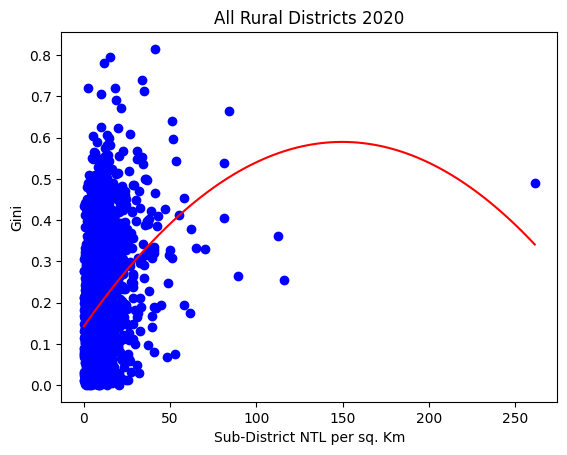

In [313]:
all = all2.copy()
# all['alesina'] = all['alesina'].abs()
# all = all[all['subdist_ntl_pa'] < 60]
all = all[all['alesina'] > 0]
# all = all[all['num']>10]
# ale = ale[ale['alesina'] < 1]


# Create a scatterplot
plt.scatter(all['subdist_ntl_pa'], all['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per sq. Km")
plt.ylabel("Gini")
plt.title("All Rural Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(all['subdist_ntl_pa'], all['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(all['subdist_ntl_pa']), max(all['subdist_ntl_pa']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(0,20)
# plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [315]:
panel = pd.merge(all, filter_sub, on=['State','District','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]

panel

,State,District,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,sum_y,numerator,num,alesina,District_code,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_ps_schools,subdist_med_other,subdist_edu_other,subdist_transportadmin_sum,villages_road,SubDistrict Area
0,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,Diglipur,819.07776,37219.00000,0.53363,170.95867,1567.05081,31.00000,0.44089,632,224.00000,77,61,27,109,34,42,97.00000,1534.90749
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,Mayabunder,329.16000,24315.00000,0.40233,89.75054,1155.31617,25.00000,0.01020,632,126.00000,57,37,19,82,18,41,83.00000,818.13158
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,Rangat,1673.97767,31561.00000,1.29215,136.18336,2475.14786,41.00000,0.13780,632,197.00000,86,78,35,129,43,52,130.00000,1295.50273
3,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,Ferrargunj,848.70778,47332.00000,0.63369,270.55780,4078.06185,43.00000,0.32220,602,205.00000,93,67,33,137,34,55,115.00000,1339.30821
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,Little Andaman,1084.89107,27380.00000,1.47247,22.18626,61.36969,6.00000,0.24463,602,41.00000,21,20,6,28,14,18,13.00000,736.78207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,WEST BENGAL,PURULIA,Purulia - I,2071.59002,170159.00000,6.10778,674.97445,26687.75149,106.00000,0.26342,321,664.00000,237,249,104,345,145,129,334.00000,339.17242
5792,WEST BENGAL,PURULIA,Purulia - II,3411.52764,191682.00000,8.85523,894.35952,34107.36879,110.00000,0.31571,321,436.00000,140,193,102,245,91,84,339.00000,385.25582
5793,WEST BENGAL,PURULIA,Raghunathpur - I,1848.50666,133690.00000,7.74996,523.10931,20855.79280,81.00000,0.02793,321,346.00000,116,116,71,196,45,35,221.00000,238.51811
5794,WEST BENGAL,PURULIA,Raghunathpur - II,4210.03672,128783.00000,17.67576,1540.76385,42583.18518,104.00000,0.47812,321,460.00000,133,122,80,226,42,64,374.00000,238.18132


## WCV

In [167]:


# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['subdist_ntl_pa'].mean()
    numerator = (group['subdist_pop_share'] * ((group['ntl_pa'])**2)).sum()
    num = group['Max_Len'].max()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) /bar_y
    return pd.Series ([numerator, wcv,num])


wcv = sub_sorted_area.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pa']).apply(calculate_wcv).reset_index()
# Rename the columns for clarity
wcv.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pa',
               'numer','WCV','num']

wcv

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,numer,WCV,num
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,182.73600,5983.00000,1.37700,41.36771,4.67086,7.00000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,1470.68700,38310.00000,1.89300,99.02536,5.25681,32.00000
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,367.27100,27718.00000,2.53500,23.12160,1.89684,27.00000
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,983.17000,32784.00000,1.67700,24.63847,2.95988,44.00000
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,1957.77500,48692.00000,2.04300,97.26337,4.82732,46.00000
...,...,...,...,...,...,...,...,...,...,...
6120,WEST BENGAL,PURULIA,321,Purulia - I,1818.13000,171425.00000,5.59300,71.69921,1.51395,107.00000
6121,WEST BENGAL,PURULIA,321,Purulia - II,3312.67000,195385.00000,9.67300,209.29729,1.49562,105.00000
6122,WEST BENGAL,PURULIA,321,Raghunathpur - I,1763.38700,99457.00000,8.06300,82.92770,1.12941,78.00000
6123,WEST BENGAL,PURULIA,321,Raghunathpur - II,3894.61000,134249.00000,17.12800,865.91857,1.71803,89.00000


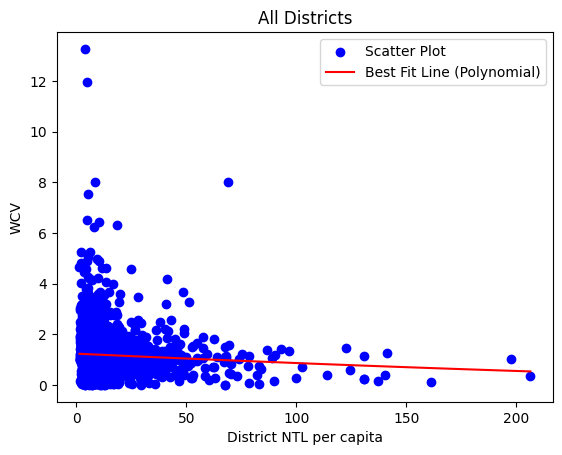

In [168]:
# wcvc = wcvc[wcvc['dist_ntl_pc'] <= 0.1]
# wcvc = wcvc[wcvc['WCV'] <= 15]
# wcvc = wcvc[wcvc['WCV'] > 0]

# Create a scatterplot
plt.scatter(wcv['subdist_ntl_pa'], wcv['WCV'], label='Scatter Plot', color='blue', marker='o')
# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcv['subdist_ntl_pa'], wcv['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcv['subdist_ntl_pa']), max(wcv['subdist_ntl_pa']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()
# Display the plot
plt.show()


In [169]:
panel_w = pd.merge(wcv, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

# panel_w.to_csv('/Users/sid/Desktop/panel_WCV_2020.csv',index=False)


## Theil

In [171]:
def calculate_theil(group):
    yi = group['ntl_pa']/group['subdist_ntl_pa']
    mu = (group['ntl_pa']*group['subdist_pop_share']).sum()
    t0 = mu/group['ntl_pa']
    # the = (group['pop_share']*yi*np.log(yi)).sum()
    the = (group['subdist_pop_share']*np.log(t0)).sum()
    num = group['Max_Len'].max()
    return pd.Series(the)

thei = sub_sorted.groupby(['State','District','District_code','Subdistrict',
                           'subdist_ntl','subdist_population','subdist_ntl_pa',
                           "Max_Len"
                           ]).apply(calculate_theil).reset_index()


# Rename the columns for clarity
thei.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pa',
               'num','theil']

thei

,State,District,District_code,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,num,theil
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,182.73600,5983.00000,1.37700,7,0.26287
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,1470.68700,38310.00000,1.89300,32,0.39302
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,367.27100,27718.00000,2.53500,27,0.31570
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,983.17000,32784.00000,1.67700,44,0.11610
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,1957.77500,48692.00000,2.04300,46,0.29136
...,...,...,...,...,...,...,...,...,...
6138,WEST BENGAL,PURULIA,321,Purulia - I,1818.13000,171425.00000,5.59300,107,8.59103
6139,WEST BENGAL,PURULIA,321,Purulia - II,3312.67000,195385.00000,9.67300,105,0.26950
6140,WEST BENGAL,PURULIA,321,Raghunathpur - I,1763.38700,99457.00000,8.06300,78,0.09011
6141,WEST BENGAL,PURULIA,321,Raghunathpur - II,3894.61000,134249.00000,17.12800,89,5.94506


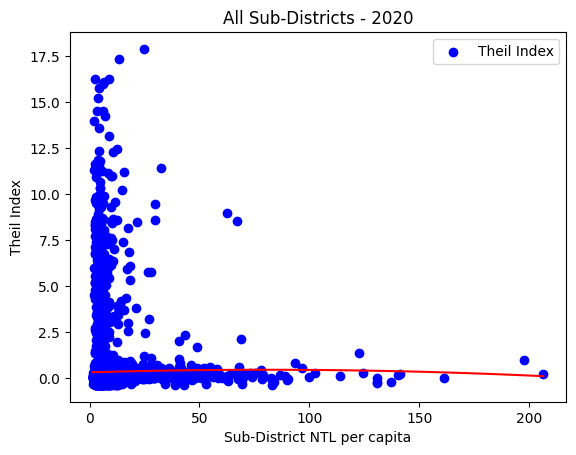

In [172]:
# thei = thei[thei['subdist_ntl_pa'] <= 0.1]
# thei = thei[thei['theil']<3]
# thei = thei[thei['theil']>0]
# Create a scatterplot
plt.scatter(thei['subdist_ntl_pa'], thei['theil'], label='Theil Index', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Theil Index")
plt.title("All Sub-Districts - 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(thei['subdist_ntl_pa'], thei['theil'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(thei['subdist_ntl_pa']), max(thei['subdist_ntl_pa']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')

# plt.ylim(0, 1)

# Add a legend
plt.legend()
# Display the plot
plt.show()

In [173]:
panel_t = pd.merge(thei, filter_sub, on=['Subdistrict','District','District_code','State'], how='right')

# panel_w.to_csv('/Users/sid/Desktop/panel_WCV_2020.csv',index=False)


## Categories

In [316]:

# Calculate the mean of each column and store it in a new Series
averages = sub_sorted_area[['availability_of_farm_gate_processing', 
               'availability_of_food_storage_warehouse', 
               'availability_of_goatary_dev_project', 
               'availability_of_milk_routes', 
               'availability_of_pigery_development', 
               'availability_of_poultry_dev_project', 
               'is_common_pastures_available', 
               'is_fertilizer_shop_available', 
               'is_govt_seed_centre_available', 
               'availability_of_major_source_of_irrigation', 
               'availability_of_livestock_extension_services', 
               'is_soil_testing_centre_available',
                'availability_of_govt_degree_college',
                    'availability_of_high_school',
                    'availability_of_middle_school',
                    'availability_of_primary_school',
                    'availability_of_ssc_school',
                    'availability_of_phc_chc',
                    'availability_of_jan_aushadhi_kendra',
                    'availability_of_mother_child_health_facilities',
                    'is_aanganwadi_centre_available',
                    'is_veterinary_hospital_available',
                    'availability_of_market',
                    'availability_of_panchayat_bhawan',
                    'availability_of_public_transport',
                    'availability_of_railway_station',
                    'is_bank_available',
                    'is_post_office_available'
               ]].mean()

# Print the averages
print("Average of each column:")
print(averages)

Average of each column:
availability_of_farm_gate_processing             0.11298
availability_of_food_storage_warehouse           0.08437
availability_of_goatary_dev_project              0.13922
availability_of_milk_routes                      0.20788
availability_of_pigery_development               0.05050
availability_of_poultry_dev_project              0.13729
is_common_pastures_available                     0.25413
is_fertilizer_shop_available                     0.17384
is_govt_seed_centre_available                    0.09965
availability_of_major_source_of_irrigation       0.24187
availability_of_livestock_extension_services     2.60905
is_soil_testing_centre_available                 0.04212
availability_of_govt_degree_college              0.03395
availability_of_high_school                      0.21916
availability_of_middle_school                    0.45905
availability_of_primary_school                   0.85578
availability_of_ssc_school                       0.13251
availab

In [317]:
df21 = sub_sorted_area.copy()
df21['str'] = df21['total_primary_school_students']/df21['total_primary_school_teachers']

df21

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,Village,state,district,subdistrict,vil_code,ac_no,village_area_sqkm,SubDistrict Area_x,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,med_other,edu_other,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_ps_schools,subdist_edu_other,subdist_med_other,villages_road,SubDistrict Area_y,ntl_pc_mean,subdist_ntl_pc,subdist_ntl_pa,subdist_pop_share,Index,Max_Len,str
47472,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,6492,DIGLIPUR,234466,KALIGHAT,645238.00000,Jagannath Dera (RV),744202.00000,543.00000,NaN,241.00000,131.00000,110.00000,70.00000,36.00000,34.00000,0,0,0,0,106.19000,0,0,0,2.00000,0,0,0,0,1,0,2.00000,0,0,0,0,0,2.00000,1,0,0,0,0,2.00000,1,1,0,0,1,1,1,14.00000,2.00000,0,0,0,0.00000,0,0,0,0,0,1,1,6.00000,6.00000,8.00000,6.00000,0.00000,0.00000,0.00000,0.00000,6.00000,8.00000,7.00000,1,0,14.00000,14.00000,Diglipur,16.84308,JAGANNATH DERA,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645238.00000,NaN,16.80348,1534.90749,28.57889,1.70077,3.00000,1,3,0,2.00000,0,0.11858,4,0,819.07776,37219.00000,224.00000,77,61,42,27,34,109,97.00000,1534.90749,0.03101,0.02201,0.53363,0.00648,1,31,7.00000
47452,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,6492,DIGLIPUR,234474,RAMNAGAR,645239.00000,Ramnagar (RV),744202.00000,543.00000,NaN,1350.00000,698.00000,652.00000,355.00000,302.00000,49.00000,1,1,0,0,460.00000,0,1,1,2.00000,0,0,1,0,1,1,2.00000,1,0,0,0,1,2.00000,1

In [318]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows = df21[df21['availability_of_primary_school'] < df21[selected_columns[1:]].max(axis=1)]

# Display the filtered rows
filtered_rows

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,Village,state,district,subdistrict,vil_code,ac_no,village_area_sqkm,SubDistrict Area_x,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,med_other,edu_other,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,subdist_ps_schools,subdist_edu_other,subdist_med_other,villages_road,SubDistrict Area_y,ntl_pc_mean,subdist_ntl_pc,subdist_ntl_pa,subdist_pop_share,Index,Max_Len,str
47453,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,6492,DIGLIPUR,234476,SITANAGAR,645219.00000,Krishnapuri (RV),744202.00000,543.00000,NaN,397.00000,206.00000,191.00000,92.00000,57.00000,18.00000,0,1,0,0,49.00000,0,0,0,3.00000,0,0,0,0,0,1,3.00000,1,0,0,0,0,3.00000,1,0,0,0,0,0.00000,0,1,1,1,1,1,1,0.00000,0.00000,0,0,0,0.00000,0,0,0,0,0,1,1,15.00000,15.00000,14.00000,15.00000,0.00000,0.00000,0.00000,0.00000,17.00000,12.00000,11.00000,1,0,19.00000,19.00000,Little Andaman,NaN,KRISHNAPURI,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645219.00000,NaN,5.31331,1534.90749,13.88000,2.61231,4.00000,0,2,0,4.00000,0,0.03496,3,0,819.07776,37219.00000,224.00000,77,61,42,27,34,109,97.00000,1534.90749,0.03101,0.02201,0.53363,0.01067,9,31,NaN
47459,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,6492,DIGLIPUR,234467,KERALAPURAM,645226.00000,Keralapuram (RV),744202.00000,543.00000,NaN,537.00000,265.00000,272.00000,171.00000,121.00000,50.00000,1,1,0,1,52.60000,0,1,1,1.00000,1,1,1,1,1,1,3.00000,1,0,0,0,1,2.00000,0

In [319]:
# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df21[selected_columns[1:]] = df21[selected_columns[1:]].where(
    df21[selected_columns[1:]].le(df21['availability_of_primary_school'], axis=0), 0
)

In [321]:
mer_cat = df21.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','village_area_sqkm':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()
# mer_cat['avg_ntl'] = mer_cat['avg_ntl'].astype(float)
# mer_cat = mer_cat.rename(columns={'total_population': 'subdist_population',
#                                   'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum','transportadmin':'subdist_transportadmin_sum','area_sq_km':'subdist_area'})
# # mer_cat['dist_ntl_pc'] = mer_cat['subdist_ntl']/mer_cat['subdist_population']
# mer_all_cat = pd.merge(df21, mer_cat, on=['Subdistrict','District','District_code','State'], how='outer')
# mer_all_cat['pop_share'] = mer_all_cat['subdist_population']/mer_all_cat['subdist_population']
mer_cat

,Subdistrict,District,District_code,State,total_population,agro,med,edu,transportadmin,village_area_sqkm,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str
0,A.Konduru,KRISHNA,510,ANDHRA PRADESH,48612.00000,115.00000,50,42,35,557.85007,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,49.00000,2423.00000,1310.00000,1288.00000,4.39133,26.43259
1,ADILABAD URBAN,ADILABAD,501,TELANGANA,538.00000,4.00000,1,1,1,3.80410,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,3.00000,39.00000,27.00000,15.00000,4.59984,6.33333
2,AHMEDGARH,SANGRUR,43,PUNJAB,111316.00000,445.00000,161,206,179,289.42274,18281.00000,2191.00000,52,16,52,53,52,0,37,47,50,39,4687.00000,587.00000,38,38,37,6,39,30,50,42,122.00000,2641.00000,2165.00000,2309.00000,1.09259,11.90651
3,AIDILABAD RURAL,ADILABAD,501,TELANGANA,36327.00000,126.00000,52,58,28,380.40099,9212.00000,6721.00000,27,0,12,33,30,3,3,24,27,31,2594.00000,138.00000,12,9,4,0,1,0,33,1,66.00000,2485.00000,1353.00000,1396.00000,3.27875,19.54310
4,AJJAMPURA,CHIKKAMAGALURU,532,KARNATAKA,101975.00000,437.00000,161,173,53,521.29863,21459.00000,16333.00000,88,1,57,93,92,1,9,68,93,90,3903.00000,351.00000,49,18,11,0,11,2,97,15,225.00000,3608.00000,1982.00000,2078.00000,17.03971,10.25569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,Ziradei,SIWAN,222,BIHAR,154808.00000,192.00000,62,93,49,131.98479,25302.00000,16341.00000,30,1,3,42,28,6,1,21,41,38,9400.00000,472.00000,34,10,4,2,6,1,50,2,127.00000,8000.00000,5947.00000,5426.00000,2.89809,27.88164
5788,annur,COIMBATORE,569,TAMIL NADU,180121.00000,171.00000,68,90,65,371.45673,53258.00000,7258.00000,23,5,26,26,25,2,11,23,25,25,4581.00000,245.00000,20,11,12,12,9,8,28,12,46.00000,4812.00000,2797.00000,2516.00000,18.49640,17.22829
5789,jamunaha,SHRAVASTI,181,UTTAR PRADESH,244200.00000,343.00000,123,151,103,337.65997,42705.00000,28927.00000,72,2,29,76,73,2,2,26,70,72,18161.00000,710.00000,49,11,11,4,11,9,70,6,180.00000,15032.00000,8479.00000,7714.00000,16.46767,48.20596
5790,madawara,LALITPUR,161,UTTAR PRADESH,155899.00000,352.00000,105,170,72,857.77164,28291.00000,23834.00000,72,0,32,92,84,1,4,48,90,92,14015.00000,335.00000,64,7,5,2,11,5,79,3,207.00000,13606.00000,7525.00000,6609.00000,22.04667,56.48461


In [323]:
panel_cat = pd.merge(panel, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
# panel_cat = panel_cat[panel_cat['dist_ntl_pc'] <= 0.04]
# panel_cat = panel_cat[panel_cat['alesina'] > 0]
# 
# panel_cat_t = pd.merge(panel_t, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
# panel_cat_t = panel_cat_t[panel_cat_t['dist_ntl_pc'] <= 0.1]
# panel_cat_t = panel_cat_t[panel_cat_t['theil'] > 1]

# panel_cat_w = pd.merge(panel_w, mer_cat, on=['Subdistrict','District','District_code','State'], how='right')
# panel_cat_w = panel_cat_w[panel_cat_w['dist_ntl_pc'] <= 0.1]
# # panel_cat_w = panel_cat_w[panel_cat_w['WCV'] > 1]
# panel_cat_w = panel_cat_w[panel_cat_w['WCV'] <= 15]

panel_cat

,State,District,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,sum_y,numerator,num,alesina,District_code,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_ps_schools,subdist_med_other,subdist_edu_other,subdist_transportadmin_sum,villages_road,SubDistrict Area,total_population,agro,med,edu,transportadmin,village_area_sqkm,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str
0,ANDHRA PRADESH,KRISHNA,A.Konduru,2139.83991,48612.00000,9.72121,94.98552,951.47879,22.00000,0.13481,510,115.00000,50,42,22,74,20,35,69.00000,220.12068,48612.00000,115.00000,50,42,35,557.85007,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,49.00000,2423.00000,1310.00000,1288.00000,4.39133,26.43259
1,TELANGANA,ADILABAD,ADILABAD URBAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501,4.00000,1,1,1,2,0,1,4.00000,329.73839,538.00000,4.00000,1,1,1,3.80410,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,3.00000,39.00000,27.00000,15.00000,4.59984,6.33333
2,PUNJAB,SANGRUR,AHMEDGARH,2535.92445,111316.00000,2.74918,542.27227,9631.54887,53.00000,0.34862,43,445.00000,161,206,53,243,153,179,174.00000,922.42861,111316.00000,445.00000,161,206,179,289.42274,18281.00000,2191.00000,52,16,52,53,52,0,37,47,50,39,4687.00000,587.00000,38,38,37,6,39,30,50,42,122.00000,2641.00000,2165.00000,2309.00000,1.09259,11.90651
3,TELANGANA,ADILABAD,AIDILABAD RURAL,1550.59447,36636.00000,4.70250,167.77595,2463.21966,36.00000,0.21213,501,129.00000,53,58,33,88,25,28,95.00000,329.73839,36327.00000,126.00000,52,58,28,380.40099,9212.00000,6721.00000,27,0,12,33,30,3,3,24,27,31,2594.00000,138.00000,12,9,4,0,1,0,33,1,66.00000,2485.00000,1353.00000,1396.00000,3.27875,19.54310
4,KARNATAKA,CHIKKAMAGALURU,AJJAMPURA,2328.66553,105524.00000,3.95336,532.80591,28933.48962,118.00000,0.08807,532,460.00000,168,180,97,269,83,54,331.00000,589.03493,101975.00000,437.00000,161,173,53,521.29863,21459.00000,16333.00000,88,1,57,93,92,1,9,68,93,90,3903.00000,351.00000,49,18,11,0,11,2,97,15,225.00000,3608.00000,1982.00000,2078.00000,17.03971,10.25569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,BIHAR,SIWAN,Ziradei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222,279.00000,84,115,59,155,56,57,233.00000,152.33201,154808.00000,192.00000,62,93,49,131.98479,25302.00000,16341.00000,30,1,3,42,28,6,1,21,41,38,9400.00000,472.00000,34,10,4,2,6,1,50,2,127.00000,8000.00000,5947.00000,5426.00000,2.89809,27.88164
5788,TAMIL NADU,COIMBATORE,annur,4311.00008,180121.00000,10.56003,342.31746,3737.64246,28.00000,0.25581,569,171.00000,68,90,26,104,64,65,69.00000,408.23753,180121.00000,171.00000,68,90,65,371.45673,53258.00000,7258.00000,23,5,26,26,25,2,11,23,25,25,4581.00000,245.00000,20,11,12,12,9,8,28,12,46.00000,4812.00000,2797.00000,2516.00000,18.49640,17.22829
5789,UTTAR PRADESH,SHRAVASTI,jamunaha,2215.28221,260349.00000,1.66643,606.99782,27212.55345,97.00000,0.08595,181,380.00000,130,162,81,223,81,110,274.00000,1329.35502,244200.00000,343.00000,123,151,103,337.65997,42705.00000,28927.00000,72,2,29,76,73,2,2,26,70,72,1816

In [324]:
panel_cat['no_1000s'] = panel_cat['subdist_population']/1000

panel_cat['edu_per_1000']= panel_cat['subdist_edu_sum']/panel_cat['no_1000s']
panel_cat['adm_per_1000']= panel_cat['subdist_transportadmin_sum']/panel_cat['no_1000s']
panel_cat['arg_per_1000']= panel_cat['subdist_agro_sum']/panel_cat['no_1000s']
panel_cat['no_1000_students'] = panel_cat['total_primary_school_students']/1000
panel_cat['primaryschool_per_100']= panel_cat['availability_of_primary_school']/panel_cat['no_1000_students']


panel_cat['children_bw_0_6']= panel_cat['total_male_child_age_bw_0_6'] + panel_cat['total_female_child_age_bw_0_6']
panel_cat['med_per_1000']= panel_cat['subdist_med_sum']/panel_cat['no_1000s']
panel_cat['phc_per_1000']= panel_cat['availability_of_phc_chc']/panel_cat['no_1000s']
panel_cat['veter_per_1000'] = panel_cat['is_veterinary_hospital_available']/panel_cat['no_1000s']
panel_cat['no_100_kids'] = panel_cat['children_bw_0_6']/100
panel_cat['no_100_kids_reg'] = panel_cat['total_no_of_registered_children_in_anganwadi']/100
panel_cat['aanganwadi_per_100']= panel_cat['is_aanganwadi_centre_available']/panel_cat['no_100_kids']
panel_cat['aanganwadi_per_100_reg']= panel_cat['is_aanganwadi_centre_available']/panel_cat['no_100_kids_reg']

panel_cat['share_roads'] = panel_cat['is_village_connected_to_all_weather_road']/panel_cat['num']
panel_cat['share_rails'] = panel_cat['availability_of_railway_station']/panel_cat['num']
panel_cat['share_pubtn'] = panel_cat['availability_of_public_transport']/panel_cat['num']
panel_cat['ps_share_elec'] = panel_cat['is_primary_school_with_electricity']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_toil'] = panel_cat['primary_school_toilet']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_clab'] = panel_cat['is_primary_school_with_computer_lab']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_play'] = panel_cat['is_primary_school_with_playground']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_dwat'] = panel_cat['is_primary_school_have_drinking_water']/panel_cat['availability_of_primary_school']
panel_cat['ps_share_meal'] = panel_cat['availability_of_mid_day_meal_scheme']/panel_cat['availability_of_primary_school']
						

panel_cat

,State,District,Subdistrict,subdist_ntl,subdist_population,subdist_ntl_pa,sum_y,numerator,num,alesina,District_code,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_ps_schools,subdist_med_other,subdist_edu_other,subdist_transportadmin_sum,villages_road,SubDistrict Area,total_population,agro,med,edu,transportadmin,village_area_sqkm,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str,no_1000s,edu_per_1000,adm_per_1000,arg_per_1000,no_1000_students,primaryschool_per_100,children_bw_0_6,med_per_1000,phc_per_1000,veter_per_1000,no_100_kids,no_100_kids_reg,aanganwadi_per_100,aanganwadi_per_100_reg,share_roads,share_rails,share_pubtn,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal
0,ANDHRA PRADESH,KRISHNA,A.Konduru,2139.83991,48612.00000,9.72121,94.98552,951.47879,22.00000,0.13481,510,115.00000,50,42,22,74,20,35,69.00000,220.12068,48612.00000,115.00000,50,42,35,557.85007,16043.00000,9587.00000,20,0,14,22,22,0,1,7,20,21,1654.00000,123.00000,10,7,3,0,4,2,22,9,49.00000,2423.00000,1310.00000,1288.00000,4.39133,26.43259,48.61200,0.86398,0.71999,2.36567,1.65400,13.30109,2598.00000,1.02855,0.08228,0.18514,25.98000,24.23000,0.84681,0.90797,0.90909,0.00000,0.63636,1.00000,0.00000,0.04545,0.31818,0.90909,0.95455
1,TELANGANA,ADILABAD,ADILABAD URBAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501,4.00000,1,1,1,2,0,1,4.00000,329.73839,538.00000,4.00000,1,1,1,3.80410,172.00000,167.00000,1,0,0,1,1,0,0,0,0,1,19.00000,3.00000,0,0,0,0,0,0,1,0,3.00000,39.00000,27.00000,15.00000,4.59984,6.33333,NaN,NaN,NaN,NaN,0.01900,52.63158,42.00000,NaN,NaN,NaN,0.42000,0.39000,2.38095,2.56410,NaN,NaN,NaN,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,PUNJAB,SANGRUR,AHMEDGARH,2535.92445,111316.00000,2.74918,542.27227,9631.54887,53.00000,0.34862,43,445.00000,161,206,53,243,153,179,174.00000,922.42861,111316.00000,445.00000,161,206,179,289.42274,18281.00000,2191.00000,52,16,52,53,52,0,37,47,50,39,4687.00000,587.00000,38,38,37,6,39,30,50,42,122.00000,2641.00000,2165.00000,2309.00000,1.09259,11.90651,111.31600,1.85059,1.60803,3.99763,4.68700,11.30787,4474.00000,1.44633,0.35035,0.37730,44.74000,26.41000,1.11757,1.89322,0.98113,0.30189,0.98113,0.98113,0.00000,0.69811,0.88679,0.94340,0.73585
3,TELANGANA,ADILABAD,AIDILABAD RURAL,1550.59447,36636.00000,4.70250,167.77595,2463.21966,36.00000,0.21213,501,129.00000,53,58,33,88,25,28,95.00000,329.73839,36327.00000,126.00000,52,58,28,380.40099,9212.00000,6721.00000,27,0,12,33,30,3,3,24,27,31,2594.00000,138.00000,12,9,4,0,1,0,33,1,66.00000,2485.00000,1353.00000,1396.00000,3.27875,19.54310,36.63600,1.58314,0.76428,3.52113,2.59400,12.72167,2749.00000,1.44666,0.02730,0.02730,27.49000,24.85000,1.20044,1.32797,0.75000,0.00000,0.33333,0.90909,0.09091,0.09091,0.72727,0.81818,0.93939
4,KARNATAKA,CHIKKAMAGALURU,AJJAMPURA,2328.66553,105524.00000,3.95336,532.80591,28933.48962,118.00000,0.08807,532,460.00000,168,180,97,269,83,54,331.00000,589.03493,101975.00000,437.00000,161,173,53,521.29863,21459.00000,16333.00000,88,1,57,93,92,1,9,68,93,90,3903.00000,351.00000,49,18,11,0,11,2,97,15,225.00000,3608.00000,1982.00000,2078.00000,17.03971,10.25569,105.52400,1.70577,0.51173,4.35920,3.90300,23.82782,4060.00000,1.59205,0.10424,0.142

In [181]:
panel_cat_w['no_1000s'] = panel_cat_w['subdist_population']/1000

panel_cat_w['edu_per_1000']= panel_cat_w['subdist_edu_sum']/panel_cat_w['no_1000s']
panel_cat_w['adm_per_1000']= panel_cat_w['subdist_transportadmin_sum']/panel_cat_w['no_1000s']
panel_cat_w['arg_per_1000']= panel_cat_w['subdist_agro_sum']/panel_cat_w['no_1000s']
panel_cat_w['no_1000_students'] = panel_cat_w['total_primary_school_students']/1000
panel_cat_w['primaryschool_per_100']= panel_cat_w['availability_of_primary_school']/panel_cat_w['no_1000_students']


panel_cat_w['children_bw_0_6']= panel_cat_w['total_male_child_age_bw_0_6'] + panel_cat_w['total_female_child_age_bw_0_6']
panel_cat_w['med_per_1000']= panel_cat_w['subdist_med_sum']/panel_cat_w['no_1000s']
panel_cat_w['phc_per_1000']= panel_cat_w['availability_of_phc_chc']/panel_cat_w['no_1000s']
panel_cat_w['veter_per_1000'] = panel_cat_w['is_veterinary_hospital_available']/panel_cat_w['no_1000s']
panel_cat_w['no_100_kids'] = panel_cat_w['children_bw_0_6']/100
panel_cat_w['no_100_kids_reg'] = panel_cat_w['total_no_of_registered_children_in_anganwadi']/100
panel_cat_w['aanganwadi_per_100']= panel_cat_w['is_aanganwadi_centre_available']/panel_cat_w['no_100_kids']
panel_cat_w['aanganwadi_per_100_reg']= panel_cat_w['is_aanganwadi_centre_available']/panel_cat_w['no_100_kids_reg']

panel_cat_w['share_roads'] = panel_cat_w['is_village_connected_to_all_weather_road']/panel_cat_w['num']
panel_cat_w['share_rails'] = panel_cat_w['availability_of_railway_station']/panel_cat_w['num']
panel_cat_w['share_pubtn'] = panel_cat_w['availability_of_public_transport']/panel_cat_w['num']


In [182]:
panel_cat_t['no_1000s'] = panel_cat_t['subdist_population']/1000

panel_cat_t['edu_per_1000']= panel_cat_t['subdist_edu_sum']/panel_cat_t['no_1000s']
panel_cat_t['adm_per_1000']= panel_cat_t['subdist_transportadmin_sum']/panel_cat_t['no_1000s']
panel_cat_t['arg_per_1000']= panel_cat_t['subdist_agro_sum']/panel_cat_t['no_1000s']
panel_cat_t['no_1000_students'] = panel_cat_t['total_primary_school_students']/1000
panel_cat_t['primaryschool_per_100']= panel_cat_t['availability_of_primary_school']/panel_cat_t['no_1000_students']


panel_cat_t['children_bw_0_6']= panel_cat_t['total_male_child_age_bw_0_6'] + panel_cat_t['total_female_child_age_bw_0_6']
panel_cat_t['med_per_1000']= panel_cat_t['subdist_med_sum']/panel_cat_t['no_1000s']
panel_cat_t['phc_per_1000']= panel_cat_t['availability_of_phc_chc']/panel_cat_t['no_1000s']
panel_cat_t['veter_per_1000'] = panel_cat_t['is_veterinary_hospital_available']/panel_cat_t['no_1000s']
panel_cat_t['no_100_kids'] = panel_cat_t['children_bw_0_6']/100
panel_cat_t['no_100_kids_reg'] = panel_cat_t['total_no_of_registered_children_in_anganwadi']/100
panel_cat_t['aanganwadi_per_100']= panel_cat_t['is_aanganwadi_centre_available']/panel_cat_t['no_100_kids']
panel_cat_t['aanganwadi_per_100_reg']= panel_cat_t['is_aanganwadi_centre_available']/panel_cat_t['no_100_kids_reg']

panel_cat_t['share_roads'] = panel_cat_t['is_village_connected_to_all_weather_road']/panel_cat_t['num']
panel_cat_t['share_rails'] = panel_cat_t['availability_of_railway_station']/panel_cat_t['num']
panel_cat_t['share_pubtn'] = panel_cat_t['availability_of_public_transport']/panel_cat_t['num']


In [183]:
print(panel_cat['subdist_population'].median())
print(panel_cat['total_population'].mean())
print(panel_cat['num'].mean())


124667.0
153859.1441632653
88.69648979591837


# No VIIRS (Only test, do not use for final)

In [16]:
mer_sub = meg.groupby(['State','District','District_code',
                       'Subdistrict'
                       ]).agg({'total_population': 'sum','agro':'sum',
                               'med':'sum','edu':'sum','transportadmin':'sum',
                               'road':'sum'}).reset_index()

mer_sub = mer_sub.rename(columns={'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum',
                                  'road':'villages_road'})

mer_all_sub = pd.merge(meg, mer_sub, on=[
                            'Subdistrict',
                            'District','District_code','State'], how='outer')
mer_all_sub['subdist_pop_share'] = mer_all_sub['total_population']/mer_all_sub['subdist_population']


In [17]:
columns_to_keep = [
    'Subdistrict', 
    'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','villages_road']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]

In [18]:
df20 = mer_all_sub.copy()
df20['str'] = df20['total_primary_school_students']/df20['total_primary_school_teachers']

In [19]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows_old = df20[df20['availability_of_primary_school'] < df20[selected_columns[1:]].max(axis=1)]

# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df20[selected_columns[1:]] = df20[selected_columns[1:]].where(
    df20[selected_columns[1:]].le(df20['availability_of_primary_school'], axis=0), 0
)


In [20]:
mer_cat_old = df20.groupby(['State','District','District_code',
                            'Subdistrict','Subdistrict_code'
                            ]).agg({'total_population': 'sum','agro':'sum','med':'sum','edu':'sum','transportadmin':'sum',
                                    'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                    'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                    'availability_of_primary_school':'sum', 
                                    'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                    'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                    'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                    'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                    'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                    'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                    'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                    'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                    'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                    'total_no_of_registered_children_in_anganwadi':'sum',
                                    'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                    'nearest_urban_proximity':'mean','str':'mean',
                                    }).reset_index()
panel_cat_old = mer_cat_old.copy()

In [22]:
panel_cat_old['no_1000s'] = panel_cat_old['total_population']/1000

panel_cat_old['edu_per_1000']= panel_cat_old['edu']/panel_cat_old['no_1000s']
panel_cat_old['adm_per_1000']= panel_cat_old['transportadmin']/panel_cat_old['no_1000s']
panel_cat_old['arg_per_1000']= panel_cat_old['agro']/panel_cat_old['no_1000s']
panel_cat_old['no_1000_students'] = panel_cat_old['total_primary_school_students']/1000
panel_cat_old['primaryschool_per_100']= panel_cat_old['availability_of_primary_school']/panel_cat_old['no_1000_students']


panel_cat_old['children_bw_0_6']= panel_cat_old['total_male_child_age_bw_0_6'] + panel_cat_old['total_female_child_age_bw_0_6']
panel_cat_old['med_per_1000']= panel_cat_old['med']/panel_cat_old['no_1000s']
panel_cat_old['phc_per_1000']= panel_cat_old['availability_of_phc_chc']/panel_cat_old['no_1000s']
panel_cat_old['veter_per_1000'] = panel_cat_old['is_veterinary_hospital_available']/panel_cat_old['no_1000s']
panel_cat_old['no_100_kids'] = panel_cat_old['children_bw_0_6']/100
panel_cat_old['no_100_kids_reg'] = panel_cat_old['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old['aanganwadi_per_100']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids']
panel_cat_old['aanganwadi_per_100_reg']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids_reg']

# panel_cat_old['share_roads'] = panel_cat_old['is_village_connected_to_all_weather_road']/panel_cat_old['num']
# panel_cat_old['share_rails'] = panel_cat_old['availability_of_railway_station']/panel_cat_old['num']
# panel_cat_old['share_pubtn'] = panel_cat_old['availability_of_public_transport']/panel_cat_old['num']
panel_cat_old['ps_share_elec'] = panel_cat_old['is_primary_school_with_electricity']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_toil'] = panel_cat_old['primary_school_toilet']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_clab'] = panel_cat_old['is_primary_school_with_computer_lab']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_play'] = panel_cat_old['is_primary_school_with_playground']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_dwat'] = panel_cat_old['is_primary_school_have_drinking_water']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_meal'] = panel_cat_old['availability_of_mid_day_meal_scheme']/panel_cat_old['availability_of_primary_school']


In [23]:
panel_cat_old

,State,District,District_code,Subdistrict,Subdistrict_code,total_population,agro,med,edu,transportadmin,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str,no_1000s,edu_per_1000,adm_per_1000,arg_per_1000,no_1000_students,primaryschool_per_100,children_bw_0_6,med_per_1000,phc_per_1000,veter_per_1000,no_100_kids,no_100_kids_reg,aanganwadi_per_100,aanganwadi_per_100_reg,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,5918,5449.00000,30,10,19,14,1744.00000,398.00000,7,0,7,7,7,0,1,5,7,7,338.00000,35.00000,5,4,3,0,2,0,7,1,7,258.00000,156.00000,138.00000,1.54053,9.27381,5.44900,3.48688,2.56928,5.50560,0.33800,20.71006,294.00000,1.83520,0.36704,0.18352,2.94000,2.58000,2.38095,2.71318,1.00000,0.00000,0.14286,0.71429,1.00000,1.00000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,40155.00000,163,89,67,47,11278.00000,5901.00000,30,0,21,32,32,1,12,29,32,32,2072.00000,202.00000,18,11,6,0,4,1,36,18,23,2102.00000,1293.00000,1534.00000,6.65673,9.66753,40.15500,1.66853,1.17046,4.05927,2.07200,15.44402,2827.00000,2.21641,0.09961,0.44826,28.27000,21.02000,1.27343,1.71265,1.00000,0.03125,0.37500,0.90625,1.00000,1.00000
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,5920,23437.00000,80,58,42,39,6581.00000,2069.00000,23,0,14,20,20,0,4,18,20,20,830.00000,121.00000,7,8,6,1,4,0,25,10,13,846.00000,574.00000,530.00000,8.95241,8.62166,23.43700,1.79204,1.66404,3.41341,0.83000,24.09639,1104.00000,2.47472,0.17067,0.42668,11.04000,8.46000,2.26449,2.95508,1.00000,0.00000,0.20000,0.90000,1.00000,1.00000
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,5921,55364.00000,130,88,78,51,9105.00000,1696.00000,37,0,32,35,35,0,11,32,34,34,1435.00000,1750.00000,22,12,9,0,5,1,41,12,29,1388.00000,860.00000,925.00000,17.38185,8.14795,55.36400,1.40886,0.92118,2.34810,1.43500,24.39024,1785.00000,1.58948,0.09031,0.21675,17.85000,13.88000,2.29692,2.95389,1.00000,0.00000,0.31429,0.91429,0.97143,0.97143
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,5922,54961.00000,144,106,79,65,13824.00000,2460.00000,44,0,43,37,37,0,6,30,37,37,1872.00000,249.00000,19,12,11,0,8,1,46,15,45,2399.00000,1455.00000,1421.00000,5.30622,7.00003,54.96100,1.43738,1.18266,2.62004,1.87200,19.76496,2876.00000,1.92864,0.14556,0.27292,28.76000,23.99000,1.59944,1.91747,1.00000,0.00000,0.16216,0.81081,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,WEST BENGAL,PURULIA,321,Purulia - I,2387,224854.00000,444,245,232,132,29754.00000,16554.00000,93,16,75,105,105,2,4,50,104,102,12427.00000,421.00000,50,37,32,8,15,4,102,37,67,10092.00000,5551.00000,5665.00000,6.21499,30.61253,224.85400,1.03178,0.58705,1.97461,12.42700,8.44934,11216.00000,1.08960,0.06671,0.16455,112.16000,100.92000,0.90942,1.01070,1.00000,0.01905,0.03810,0.47619,0.99048,0.97143
6669,WEST BENGAL,PURULIA,321,Purulia - II,2379,210601.00000,136,147,192,84,36870.00000,19320.00000,89,4,50,102,91,

In [43]:
ale = pd.read_csv('/Users/sid/Desktop/ntlpa.csv')
als = pd.read_csv('/Users/sid/Desktop/ntlpc.csv')

ale = ale.drop(['State', 'District','Subdistrict'], axis=1)

als = als.drop(['State', 'District','Subdistrict'], axis=1)


In [44]:
ale

,SubDistrict code,subdist_ntl_pa,sum_y,numerator,num,alesina
0,5918.00000,1.37716,30.54440,115.19297,10.00000,0.34573
1,5917.00000,1.44244,12.97944,54.91814,8.00000,0.06721
2,5919.00000,1.89344,149.08961,1583.63109,34.00000,0.40459
3,5920.00000,2.53485,104.77404,996.59021,24.00000,0.24902
4,5921.00000,1.67679,165.63298,2642.40967,43.00000,0.28124
...,...,...,...,...,...,...
5595,2387.00000,5.59263,615.80051,23891.03634,101.00000,0.24165
5596,2379.00000,9.67282,885.09703,26120.09137,93.00000,0.37611
5597,2382.00000,8.06275,550.94110,14167.58137,66.00000,0.23590
5598,2381.00000,17.12818,1553.64065,25846.30113,74.00000,0.56389


In [45]:
test_pa = pd.merge(panel_cat_old, ale, 
                # on=['State','District'],
                left_on='Subdistrict_code',right_on='SubDistrict code', 
                how='inner')

test_pc = pd.merge(panel_cat_old, als, 
                # on=['State','District'],
                left_on='Subdistrict_code',right_on='SubDistrict code', 
                how='inner')



test_pa['share_roads'] = test_pa['is_village_connected_to_all_weather_road']/test_pa['num']
test_pa['share_rails'] = test_pa['availability_of_railway_station']/test_pa['num']
test_pa['share_pubtn'] = test_pa['availability_of_public_transport']/test_pa['num']

test_pc['share_roads'] = test_pc['is_village_connected_to_all_weather_road']/test_pc['num']
test_pc['share_rails'] = test_pc['availability_of_railway_station']/test_pc['num']
test_pc['share_pubtn'] = test_pc['availability_of_public_transport']/test_pc['num']


test_pc

,State,District,District_code,Subdistrict,Subdistrict_code,total_population,agro,med,edu,transportadmin,total_hhd,total_hhd_engaged_in_farm_activities,is_village_connected_to_all_weather_road,availability_of_railway_station,availability_of_public_transport,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,availability_of_govt_degree_college,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_internal_pucca_road,total_no_of_registered_children_in_anganwadi,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,nearest_urban_proximity,str,no_1000s,edu_per_1000,adm_per_1000,arg_per_1000,no_1000_students,primaryschool_per_100,children_bw_0_6,med_per_1000,phc_per_1000,veter_per_1000,no_100_kids,no_100_kids_reg,aanganwadi_per_100,aanganwadi_per_100_reg,ps_share_elec,ps_share_toil,ps_share_clab,ps_share_play,ps_share_dwat,ps_share_meal,SubDistrict code,subdist_ntl_pc,sum_y,numerator,num,alesina,share_roads,share_rails,share_pubtn
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,603,Great Nicobar,5918,5449.00000,30,10,19,14,1744.00000,398.00000,7,0,7,7,7,0,1,5,7,7,338.00000,35.00000,5,4,3,0,2,0,7,1,7,258.00000,156.00000,138.00000,1.54053,9.27381,5.44900,3.48688,2.56928,5.50560,0.33800,20.71006,294.00000,1.83520,0.36704,0.18352,2.94000,2.58000,2.38095,2.71318,1.00000,0.00000,0.14286,0.71429,1.00000,1.00000,5918.00000,0.28425,0.21489,0.62369,7.00000,0.31359,1.00000,0.00000,1.00000
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,40155.00000,163,89,67,47,11278.00000,5901.00000,30,0,21,32,32,1,12,29,32,32,2072.00000,202.00000,18,11,6,0,4,1,36,18,23,2102.00000,1293.00000,1534.00000,6.65673,9.66753,40.15500,1.66853,1.17046,4.05927,2.07200,15.44402,2827.00000,2.21641,0.09961,0.44826,28.27000,21.02000,1.27343,1.71265,1.00000,0.03125,0.37500,0.90625,1.00000,1.00000,5919.00000,0.05376,2.55249,13.56384,32.00000,0.69913,0.93750,0.00000,0.65625
2,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Mayabunder,5920,23437.00000,80,58,42,39,6581.00000,2069.00000,23,0,14,20,20,0,4,18,20,20,830.00000,121.00000,7,8,6,1,4,0,25,10,13,846.00000,574.00000,530.00000,8.95241,8.62166,23.43700,1.79204,1.66404,3.41341,0.83000,24.09639,1104.00000,2.47472,0.17067,0.42668,11.04000,8.46000,2.26449,2.95508,1.00000,0.00000,0.20000,0.90000,1.00000,1.00000,5920.00000,0.02038,0.81193,5.89380,27.00000,0.49933,0.85185,0.00000,0.51852
3,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,632,Rangat,5921,55364.00000,130,88,78,51,9105.00000,1696.00000,37,0,32,35,35,0,11,32,34,34,1435.00000,1750.00000,22,12,9,0,5,1,41,12,29,1388.00000,860.00000,925.00000,17.38185,8.14795,55.36400,1.40886,0.92118,2.34810,1.43500,24.39024,1785.00000,1.58948,0.09031,0.21675,17.85000,13.88000,2.29692,2.95389,1.00000,0.00000,0.31429,0.91429,0.97143,0.97143,5921.00000,0.05135,1.60002,13.13910,44.00000,0.64946,0.84091,0.00000,0.72727
4,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,602,Ferrargunj,5922,54961.00000,144,106,79,65,13824.00000,2460.00000,44,0,43,37,37,0,6,30,37,37,1872.00000,249.00000,19,12,11,0,8,1,46,15,45,2399.00000,1455.00000,1421.00000,5.30622,7.00003,54.96100,1.43738,1.18266,2.62004,1.87200,19.76496,2876.00000,1.92864,0.14556,0.27292,28.76000,23.99000,1.59944,1.91747,1.00000,0.00000,0.16216,0.81081,1.00000,1.00000,5922.00000,0.04614,5.77861,22.48935,46.00000,0.85253,0.95652,0.00000,0.93478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5

In [46]:
test_pc.to_csv('/Users/sid/Desktop/gini_pc.csv',index=False)
test_pa.to_csv('/Users/sid/Desktop/gini_pa.csv',index=False)

# Export

In [325]:

panel_cat.to_csv('/Users/sid/Desktop/2020catdata_area.csv',index=False)
# panel_cat_t.to_csv('/Users/sid/Desktop/2020catdata_area_t.csv',index=False)
# panel_cat_w.to_csv('/Users/sid/Desktop/2020catdata_area_w.csv',index=False)

# panel_cat_old.to_csv('/Users/sid/Desktop/2020catdata_old2.csv',index=False)
# panel_cat_old_t.to_csv('/Users/sid/Desktop/2020cat_t_data.csv',index=False)
# panel_cat_old_w.to_csv('/Users/sid/Desktop/2020cat_w_data.csv',index=False)

# 2017

In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

ma = pd.read_csv('/Users/sid/Desktop/ma_ntl_2017.csv',low_memory=False) #ma_ntl_data ma_ntl_data_updatedsums_NoVIIRS ma_ntl_data_updatedsums_NEW ma_ntl_data_updatedsums_NEW_Alldata


meg = ma.copy()
# meg = meg.drop([
#     'Subdistrict', 'SubDistrict code', 'District','District code','Block code', 'Block', 'State',
#        'State code','Village',
#        'other_assembly_constituencies'
#        ], axis=1)

meg = meg.rename(columns={'state_name': 'State', 'district_name': 'District','gp_name':'GP',
                                    'sub_district_name':'Subdistrict','village_name':'Village','block_name':'Block',
                                    'state_code':'State_code','district_code':'District_code','sub_district_code':'Subdistrict_code',
                                    'block_code':'Block_code','gp_code':'GP_code','Village code':'Village_code','Total Population':'total_population'
                                    })

meg = meg.dropna(subset=['avg_ntl'])
meg = meg.dropna(subset=['total_population'])
# # meg = meg[meg['total_population'] != 'Nava Mota']
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']

# # Reset the index if needed
# meg.reset_index(drop=True, inplace=True)


In [142]:
# Calculate the mean of each column and store it in a new Series
averages = meg[[
    'total_population',
    # 'availability_of_farm_gate_processing', 
    # 'availability_of_food_storage_warehouse', 
    # 'availability_of_goatary_dev_project', 
    # 'availability_of_milk_routes', 
    # 'availability_of_pigery_development', 
    # 'availability_of_poultry_dev_project', 
    # 'is_common_pastures_available', 
    # 'is_fertilizer_shop_available', 
    # 'is_govt_seed_centre_available', 
    # 'availability_of_major_source_of_irrigation', 
    # 'availability_of_livestock_extension_services', 
    # 'is_soil_testing_centre_available',
    'Availability of Sub centre /PHC/CHC',
    'Availability Of Aanganwadi Centre',
    'Availability of Veterinary Clinic Hospital',
    'Availability of markets',
    'Availability of Public Transport',
    'Availability of banks',
    'Availability of Post office/Sub-Post office',
    'Whether the village is connected to All  weather road'
               ]]

# Print the averages
summary_stats = averages.describe()
summary_stats

,total_population,Availability of Sub centre /PHC/CHC,Availability Of Aanganwadi Centre,Availability of Veterinary Clinic Hospital,Availability of markets,Availability of Public Transport,Availability of banks,Availability of Post office/Sub-Post office,Whether the village is connected to All weather road
count,418619.00000,418619.00000,418619.00000,418619.00000,418619.00000,418619.00000,418619.00000,418619.00000,418619.00000
mean,9249.10217,0.21519,0.91993,0.09523,0.39549,0.43705,0.27634,0.25352,0.72675
std,1236204.74184,0.41095,0.27141,0.29353,0.48896,0.49602,0.44719,0.43503,0.44563
min,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,561.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1136.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,2196.00000,0.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000
max,371577072.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


### Subdist Level

In [143]:
mer_sub = meg.groupby(['State','District','District code','Sub District']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'med':'sum','edu':'sum','transportadmin':'sum',
                                                                               'road':'sum','SubDistrict Area':'mean','ntl_pc':'mean'
                                                                               }).reset_index()
mer_sub['avg_ntl'] = mer_sub['avg_ntl'].astype(float)
mer_sub = mer_sub.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum','SubDistrict Area':'area',
                                  'road':'villages_road','ntl_pc':'ntl_pc_mean'
                                  })
mer_sub['subdist_ntl_pc'] = mer_sub['subdist_ntl']/mer_sub['subdist_population']
mer_all_sub = pd.merge(meg, mer_sub, on=['Sub District','District','District code','State'], how='outer')
mer_all_sub['subdist_pop_share'] = mer_all_sub['total_population']/mer_all_sub['subdist_population']

mer_all_sub = mer_all_sub.rename(columns={'Sub District':'Subdistrict'})
mer_all_sub

,State,State code,Subdistrict,Sub District code,Gram Panchayat,Gram Panchayat code,PIN,District,District code,Development Block,Development Block code,Village,Village_code,total_population,Male,Female,Total Household,Total number of SHGs promoted,Total Area (in hectares),Net sown Area(In hectares),Total Un irrigated land area (in hectare),Area irrigated (in hectare),% households engaged exclusively in Farm activitie,% households engaged exclusively in Non-farm activities,Availability of banks,Availability of bank/Business correspondent with internet connectivity,Availability of ATM,Whether the village is connected to All weather road,Whether village has an internal cc/ brick road,Availability of Public Transport,Availability of Internet Café/Common Service Center,Availability of electricity for domestic use(in Hrs),Availability of Public Distribution System (PDS),Availability of markets,Availability of Piped tap water,Availability of Telephone Services,Total no of household using clean energy (LPG/Bio gas),No of household with kuccha wall and kuccha roof,Availability of Post office/Sub-Post office,Availability of School,Availability of Vocational Educational Centre/ITI/RSETI/DDU-GKY,Availability of Sub centre /PHC/CHC,Availability of Veterinary Clinic Hospital,Availability of drainage facilities,Availability of Soil Testing Centres,Availability of government Seed,Availability of Fertilizer Shop,Community waste disposal system,Community bio gas or recycle of waste for production use,Is the village Open Defacation Free,Availability Of Aanganwadi Centre,No of total children in the age group of 0-3 years,No of children aged 0-3 years registered under Aanganwadi,No of children aged 0-3 years immunized,No of children categorized as Non-Stunted as per ICDS record,No. of households mobilized into SHGs,No. of households mobilized into Producer Groups (PGs),No. of households supported by village based Agricultural Extension Workers,No. of households supported by village based Livestock Extension Workers,No. of SHGs accessed bank loans,Community bio gas or recycle of waste for production use,No of children categorized as Non- Stunted as per ICDS record,Availability of electricity for domestic use(in Hrs),Total no of household using clean energy (LPG/Bio gas),No. of households mobilized into Producer Groups (PGs),% households engaged exclusively in Non- farm activities,edu,med,road,transportadmin,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,ntl_pc,subdist_ntl,subdist_population,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,ntl_pc_mean,subdist_ntl_pc,subdist_pop_share
0,ODISHA,21,Kochinda,2782,DIMIRIMUNDA,121315.00000,768107.00000,SAMBALPUR,371,JAMANKIRA,3560,Bamandagarh,381624,542.00000,274.00000,268.00000,130.00000,8.00000,246.00000,125.85000,125.85000,0.00000,80.00000,20.00000,0,0,0,0,0,0,0,8-12 Hrs,1,0,0,Mobile,0,103.00000,1,2,0,0,0,Open Kuccha Drainage,0,0,0,0,0,0,1,28.00000,28.00000,28.00000,28,86.00000,0,48.00000,43.00000,0.00000,0,0.00000,0,0,0.00000,0,2.00000,1,0,0,2.92595,592.44623,4.17600,11.64111,3.97858,0.02148,2060.10665,64542.00000,132,228.00000,50,170,592.44623,0.34761,0.03192,0.00840
1,ODISHA,21,Kochinda,2782,GUNDURUCHUAN,121317.00000,768222.00000,SAMBALPUR,371,JAMANKIRA,3560,Khamarbahal,381538,335.00000,161.00000,174.00000,99.00000,4.00000,281.00000,120.09000,114.65000,5.44000,80.00000,20.00000,0,0,0,0,0,0,0,0,0,0,0,Mobile,0,34.00000,0,2,0,0,0,Open Kuccha Drainage,0,0,0,1,0,1,1,13.00000,13.00000,13.00000,13,40.00000,0,10.00000,20.00000,3.00000,1,0.00000,>12 hrs,0,0.00000,0,2.00000,1,0,0,3.28962,592.44623,4.17600,11.32111,3.44147,0.03379,2060.10665,64542.00000,132,228.00000,50,170,592.44623,0.34761,0.03192,0.00519
2,ODISHA,21,Kochinda,2782,HADIPALI,121355.00000,768222.00000,SAMBALPUR,371,KUCHINDA,3562,Hadipalikudopali,381500,760.00000,401.00000,359.00000,220.00000,13.00000,329.00000,150.60000,150.60000,1.00000,78.00000,22.00000,0,0,0,1,1,0,0,0,1,0,50 to 100% habitations covered,

In [144]:
# Calculate the mean of each column and store it in a new Series
averages = mer_all_sub[['avg_ntl',
                          'area_sq_km',
                          'total_population',
               ]].mean()

# Print the averages
print("Average of each column:")
print(averages)

Average of each column:
avg_ntl              37.47146
area_sq_km            5.89182
total_population   9249.10217
dtype: float64


In [145]:
columns_to_keep = ['Sub District', 'District', 'District code', 'State', 'subdist_med_sum',
                     'subdist_edu_sum','subdist_transportadmin_sum','villages_road','area']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]
filter_sub = filter_sub.rename(columns={'Sub District': 'Subdistrict'})
# filter_sub 

## Sorting on NTL_pc

In [146]:
sub_sorted = mer_all_sub.sort_values(by=['State','District', 'Subdistrict','ntl_pc'])
sub_sorted['Index'] = sub_sorted.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted['Max_Len'] = sub_sorted.groupby(['State','District','Subdistrict'])['Index'].transform('max')

In [147]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale2 = sub_sorted.groupby(['State','District','District code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc','ntl_pc_mean']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale2.columns = ['State','District','District code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

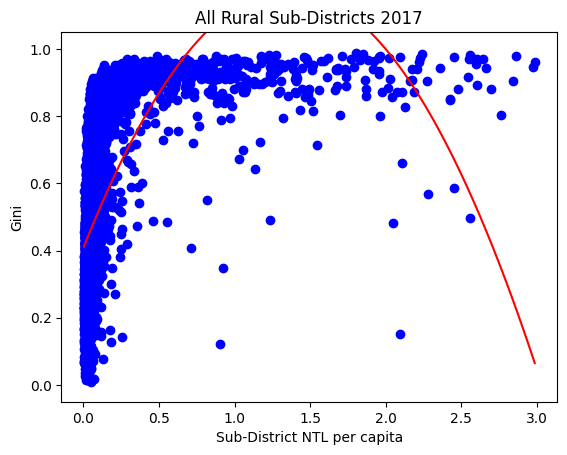

In [150]:
ale = ale2.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.2]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2017")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(0,0.105)
# plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [152]:
ale2.to_csv('/Users/sid/Desktop/2017gini.csv',index=False)

In [13]:
panel_old = pd.merge(ale2, filter_sub, on=['State','District','District code','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]


### Categories

In [40]:
df20 = sub_sorted.copy()
mer_cat_old = df20.groupby(['Subdistrict','District','District code','State']).agg({ 'total_population': 'sum',
                                                                               'med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum',
                                                                               'Total Household':'sum','Whether the village is connected to All  weather road':'sum',
                                                                               'Availability of Public Transport':'sum',
                                                                            #    'availability_of_primary_school':'sum', 
                                                                               'Availability of Sub centre /PHC/CHC':'sum',
                                                                               'Availability Of Aanganwadi Centre':'sum','Availability of Veterinary Clinic Hospital':'sum',
                                                                               'Whether village has an internal cc/ brick  road':'sum',
                                                                               'No of children aged 0-3 years registered  under Aanganwadi':'sum',
                                                                               }).reset_index()
mer_cat_old

,Subdistrict,District,District code,State,total_population,med,edu,transportadmin,area_sq_km,Total Household,Whether the village is connected to All weather road,Availability of Public Transport,Availability of Sub centre /PHC/CHC,Availability Of Aanganwadi Centre,Availability of Veterinary Clinic Hospital,Whether village has an internal cc/ brick road,No of children aged 0-3 years registered under Aanganwadi
0,A.Konduru,KRISHNA,510,ANDHRA PRADESH,65714.00000,17,43.00000,14,380.05028,17370.00000,0,11,13,17,7,0,0.00000
1,ADILABAD URBAN,ADILABAD,501,TELANGANA,540.00000,2,1.00000,2,40.50377,132.00000,1,1,0,2,0,1,12.00000
2,AIDILABAD RURAL,ADILABAD,501,TELANGANA,46884.00000,38,76.00000,7,487.15112,11037.00000,35,10,12,38,6,35,1323.00000
3,ANTHERGAON,PEDDAPALLI,682,TELANGANA,26871.00000,16,23.00000,4,173.49506,7175.00000,15,16,6,16,0,1,336.00000
4,ARJYAPALLI MARINE,GANJAM,354,ODISHA,9389.00000,1,0.00000,1,5.57448,1963.00000,1,1,0,1,0,1,579.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,Ziradei,SIWAN,222,BIHAR,178901.00000,73,127.00000,66,149.00708,26658.00000,67,14,35,73,3,50,4802.00000
5235,annur,COIMBATORE,569,TAMIL NADU,7309.00000,2,4.00000,1,28.29104,2149.00000,1,2,2,2,1,1,167.00000
5236,jamunaha,SHRAVASTI,181,UTTAR PRADESH,224139.00000,77,156.00000,77,319.79581,36203.00000,65,40,3,77,5,56,9733.00000
5237,madawara,LALITPUR,161,UTTAR PRADESH,111259044.00000,80,130.00000,31,845.59326,111137330.00000,84,29,7,80,0,74,8490.00000


In [45]:
panel_cat_old = pd.merge(panel_old, mer_cat_old, on=['Subdistrict','District','District code','State'], how='right')

panel_cat_old['no_1000s'] = panel_cat_old['subdist_population']/1000

panel_cat_old['edu_per_1000']= panel_cat_old['subdist_edu_sum']/panel_cat_old['no_1000s']
panel_cat_old['adm_per_1000']= panel_cat_old['subdist_transportadmin_sum']/panel_cat_old['no_1000s']

panel_cat_old['med_per_1000']= panel_cat_old['subdist_med_sum']/panel_cat_old['no_1000s']
panel_cat_old['phc_per_1000']= panel_cat_old['Availability of Sub centre /PHC/CHC']/panel_cat_old['no_1000s']
panel_cat_old['veter_per_1000'] = panel_cat_old['Availability of Veterinary Clinic Hospital']/panel_cat_old['no_1000s']

panel_cat_old['share_roads'] = panel_cat_old['Whether the village is connected to All  weather road']/panel_cat_old['num']
panel_cat_old['share_pubtn'] = panel_cat_old['Availability of Public Transport']/panel_cat_old['num']


In [46]:
panel_cat_old.to_csv('/Users/sid/Desktop/2017catdata_old2.csv',index=False)